In [47]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import datetime as dt
from datetime import timedelta


import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import levene
from scipy.stats import ttest_1samp

In [48]:
try:
    df = pd.read_csv(r"C:\Users\mitch\OneDrive\Documenten\Studie Toegepaste wiskunde\Moduleren project\GBS_MOD_12082024.csv", sep = ';')
except:
    df = pd.read_csv(r"C:\Users\Chong\Desktop\Modelleren project\info\GBS_MOD_12082024.csv", sep = ';')
    

In [49]:
#df = pd.read_csv(r"C:\Users\Chong\Desktop\Modelleren project\info\GBS_MOD_12082024.csv", sep = ';')

In [50]:
df

,Patientcode,Age,Sex,MRC_sum_e,MRC_sum_w1,CNI_e,CNI_Bulbar_e,CNI_Facial_e,CNI_Oculomotor_e,CNI_w1,...,Comorbidity_respiration,Days_between_onset_and_admission,Date_onset_weakness,Continent,Country_of_inclusion,Surv_days,Surv_status,Surv_unable_to_walk,Walking_again,Deceased
0,P0001,75.0,0,50.0,53.0,1.0,0.0,0.0,1.0,1.0,...,0.0,5.0,16-06-2016,1,5,125.0,1.0,1,1.0,0
1,P0002,22.0,0,50.0,46.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,22-11-2017,5,19,49.0,1.0,1,1.0,0
2,P0003,63.0,0,40.0,53.0,0.0,0.0,0.0,0.0,0.0,...,0.0,15.0,28-12-2020,2,11,752.0,0.0,1,NaN,0
3,P0004,30.0,1,60.0,59.0,1.0,1.0,1.0,1.0,1.0,...,0.0,10.0,30-03-2020,1,6,13.0,1.0,1,1.0,0
4,P0005,48.0,1,39.0,45.0,0.0,0.0,0.0,0.0,1.0,...,0.0,3.0,28-12-2015,1,2,14.0,0.0,1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,P1496,52.0,1,19.0,NaN,0.0,0.0,0.0,0.0,NaN,...,0.0,12.0,04-09-2016,1,5,26.0,0.0,1,NaN,0
1496,P1497,66.0,0,54.0,55.0,1.0,1.0,1.0,0.0,0.0,...,0.0,9.0,04-02-2017,1,1,30.0,1.0,1,1.0,0
1497,P1498,67.0,0,33.0,46.0,1.0,1.0,1.0,0.0,1.0,...,0.0,1.0,30-04-2017,6,21,42.0,1.0,1,1.0,0
1498,P1499,35.0,1,1.0,3.0,1.0,1.0,0.0,0.0,1.0,...,0.0,5.0,03-10-2017,3,13,280.0,1.0,1,1.0,0


In [51]:
# df.columns

In [52]:
# a =  df[['Surv_status', 'Deceased']]

In [53]:
# df.dtypes

In [54]:

# past de datum naar yyyy-mm-dd
# dan selecteer dan mm om de correlatie te bepalen met andere data
df['date_sickness'] = pd.to_datetime(df['Date_onset_weakness'], format = "%d-%m-%Y")
df['date_month'] = df['date_sickness'].dt.month

In [55]:
df = df.drop(columns = ['Patientcode','Date_onset_weakness'])
df['CSF_protein_level'] = df['CSF_protein_level'].str.replace(',','.').astype(float)

#df['Walking_again'] = df['Walking_again'].fillna(0)


In [56]:

corr_matrix = df.corr()
sorted_corr = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)).unstack().sort_values(ascending=False)
sorted_corr

Country_of_inclusion  Continent                0.912135
MRC_sum_w1            MRC_sum_e                0.813435
Surv_unable_to_walk   GBSDS_e                  0.766703
GBSDS_w1              GBSDS_e                  0.762471
CNI_Oculomotor_w1     CNI_Oculomotor_e         0.758196
                                                 ...   
date_month            Ant_event_respiratory         NaN
                      Ant_event_vaccination         NaN
                      Ant_event_other               NaN
                      Walking_again                 NaN
                      date_month                    NaN
Length: 1296, dtype: float64

In [57]:
a = df.corr()['date_month'].sort_values(ascending=False)
print(a)


date_month                          1.000000
Country_of_inclusion                0.042215
Continent                           0.042008
CSF_protein_level                   0.034668
Deceased                            0.032537
Comorbidity_respiration             0.028531
GBSDS_w1                            0.027320
Sens_deficits_e                     0.024639
Able_to_walk_e                      0.014984
Surv_status                         0.009699
GBSDS_e                             0.007570
Sens_deficits_w1                    0.004381
Pain_e                              0.003648
Days_between_onset_and_admission    0.000450
Pain_w1                             0.000274
CNI_Bulbar_w1                      -0.000925
CNI_Bulbar_e                       -0.005650
Surv_unable_to_walk                -0.007161
Surv_days                          -0.012387
Able_to_walk_w1                    -0.013766
CNI_e                              -0.017687
CNI_Facial_e                       -0.018265
Ant_event 

In [58]:
df['Continent'].value_counts()

1    878
2    178
5    176
4    164
3     71
6     33
Name: Continent, dtype: int64

In [59]:
df['Country_of_inclusion'].value_counts(sort=True)

1     196
19    176
11    161
6     160
5     130
2     129
7     102
18     66
15     63
3      60
13     51
8      40
10     34
17     28
21     25
4      18
12     17
14     16
9      16
16      6
20      6
Name: Country_of_inclusion, dtype: int64

In [60]:
data = {
    'country_code': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21],
    'country_name': ['Nederland', 'Verenigd Koninkrijk', 'Duitsland', 'België', 'Denemarken', 
                     'Italië', 'Spanje', 'Frankrijk', 'Griekenland', 'Zwitserland', 
                     'Verenigde Staten', 'Canada', 'Argentinië', 'Brazilië', 'Japan', 
                     'Taiwan', 'Maleisië', 'China', 'Bangladesh', 'Australië', 'Zuid-Afrika']
}


df_klimaat = pd.DataFrame(data)

climate_data = {
    'A_Klimaat': ['Maleisië', 'Bangladesh', 'Brazilië'],
    'B_Klimaat': ['Spanje'],
    'C_Klimaat': ['Nederland', 'Verenigd Koninkrijk', 'België', 'Denemarken', 'Duitsland', 'Frankrijk', 'Italië', 'Griekenland', 'Zwitserland', 'Argentinië', 'Japan', 'Taiwan', 'China', 'Australië', 'Zuid-Afrika'],
    'D_Klimaat': ['Verenigde Staten', 'Canada']
}

# Function to assign the climate category based on the country
def assign_climate(country):
    if country in climate_data['A_Klimaat']:
        return 'A Klimaat'
    elif country in climate_data['B_Klimaat']:
        return 'B Klimaat'
    elif country in climate_data['C_Klimaat']:
        return 'C Klimaat'
    elif country in climate_data['D_Klimaat']:
        return 'D Klimaat'
    else:
        return 'Unknown'

# Add a new column 'Climate' to the dataframe
df_klimaat['klimaat'] = df_klimaat['country_name'].apply(assign_climate)


print(df_klimaat)


    country_code         country_name    klimaat
0              1            Nederland  C Klimaat
1              2  Verenigd Koninkrijk  C Klimaat
2              3            Duitsland  C Klimaat
3              4               België  C Klimaat
4              5           Denemarken  C Klimaat
5              6               Italië  C Klimaat
6              7               Spanje  B Klimaat
7              8            Frankrijk  C Klimaat
8              9          Griekenland  C Klimaat
9             10          Zwitserland  C Klimaat
10            11     Verenigde Staten  D Klimaat
11            12               Canada  D Klimaat
12            13           Argentinië  C Klimaat
13            14             Brazilië  A Klimaat
14            15                Japan  C Klimaat
15            16               Taiwan  C Klimaat
16            17             Maleisië  A Klimaat
17            18                China  C Klimaat
18            19           Bangladesh  A Klimaat
19            20    

In [61]:
# df en df_klimaat joinen op elkaar
df = pd.merge(df, df_klimaat, 
                     left_on='Country_of_inclusion', right_on='country_code',
                     how = 'left')

df = df.drop(columns = 'country_code')

Text(0.5, 1.0, 'Verdeling van patienten per continent')

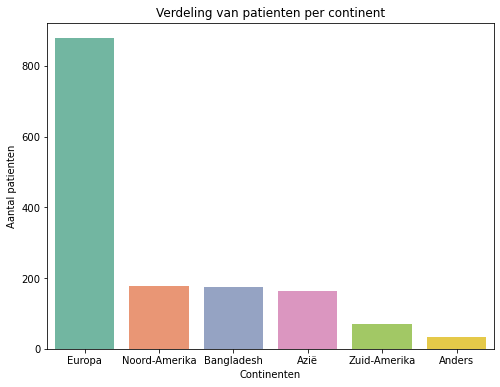

In [62]:
continent_map = {
    1: 'Europa',
    2: 'Noord-Amerika',
    3: 'Zuid-Amerika',
    4: 'Azië',
    5: 'Bangladesh',
    6: 'Anders'
}

df['landen'] = df['Continent'].map(continent_map)
Continent_counts = df['landen'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=Continent_counts.index, y=Continent_counts.values, palette='Set2')

plt.xlabel('Continenten')
plt.ylabel('Aantal patienten')
plt.title('Verdeling van patienten per continent')

Text(0, 0.5, 'Aantal patient')

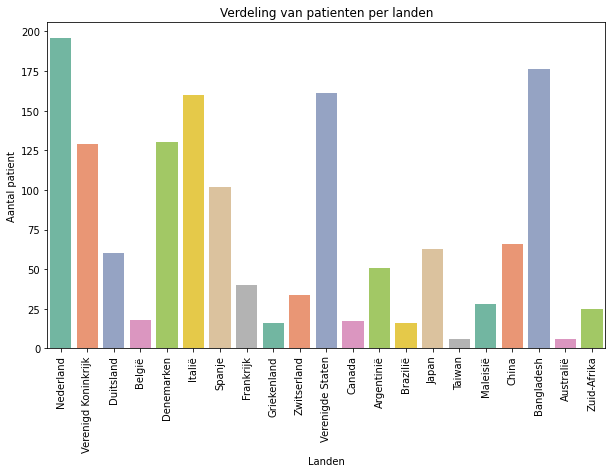

In [63]:
plt.figure(figsize=(10, 6))
sns.countplot(data  =df,x='country_name', palette='Set2', order = [
                    'Nederland', 'Verenigd Koninkrijk', 'Duitsland', 'België', 'Denemarken', 
                     'Italië', 'Spanje', 'Frankrijk', 'Griekenland', 'Zwitserland', 
                     'Verenigde Staten', 'Canada', 'Argentinië', 'Brazilië', 'Japan', 
                     'Taiwan', 'Maleisië', 'China', 'Bangladesh', 'Australië', 'Zuid-Afrika'])
plt.title('Verdeling van patienten per landen')
plt.xticks(rotation = 90)
plt.xlabel('Landen')
plt.ylabel('Aantal patient')

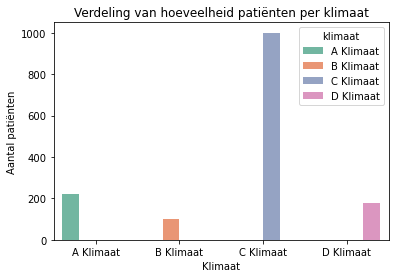

In [ ]:
sns.countplot(data=df, x='klimaat', hue='klimaat',
    palette='Set2',
    hue_order=['A Klimaat', 'B Klimaat', 'C Klimaat', 'D Klimaat'],
    order=['A Klimaat', 'B Klimaat', 'C Klimaat', 'D Klimaat'],
)

plt.title('Verdeling van hoeveelheid patiënten per klimaat')
plt.xlabel('Klimaat')
plt.ylabel('Aantal patiënten')

plt.show()


In [65]:
df['klimaat'].value_counts()

C Klimaat    1000
A Klimaat     220
D Klimaat     178
B Klimaat     102
Name: klimaat, dtype: int64

Text(0.5, 1.0, 'Verdeling hoeveelheid GBS per hafrond')

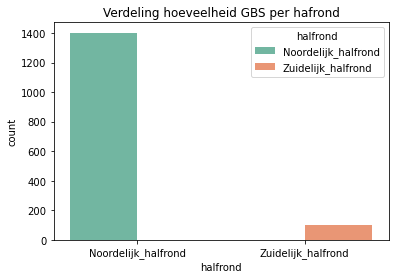

In [66]:
halfrond_data = {
    'Noordelijk_halfrond': ['Nederland', 'Verenigd Koninkrijk', 'Duitsland', 'België', 'Denemarken', 
                     'Italië', 'Spanje', 'Frankrijk', 'Griekenland', 'Zwitserland', 
                     'Verenigde Staten', 'Canada','Japan', 
                     'Taiwan', 'Maleisië', 'China', 'Bangladesh'],

    'Zuidelijk_halfrond': ['Argentinië','Brazilië','Australië', 'Zuid-Afrika']
}


def assign_halfrond(country):
    if country in halfrond_data['Noordelijk_halfrond']:
        return 'Noordelijk_halfrond'
    elif country in halfrond_data['Zuidelijk_halfrond']:
        return 'Zuidelijk_halfrond'


df['halfrond'] = df['country_name'].apply(assign_halfrond)


sns.countplot(data = df, x='halfrond', hue = 'halfrond', palette='Set2')
plt.title('Verdeling hoeveelheid GBS per hafrond')

Seizoenen definieren opbasis van de halfrond.

Noordelijk_halfrond: lente 3-5, zomer 6-8, herfst 9-11, winter 12-2

Zuidelijk halfrond: lente 9-11, zomer 12-2, herfst 3-5, winter 6-8

In [67]:
def seizoenen(halfrond, date_month):
    seizoen1 = [12,1,2]
    seizoen2 = [3,4,5]
    seizoen3 = [6,7,8]
    seizoen4 = [9,10,11]
    if str(halfrond) == 'Noordelijk_halfrond':
        if date_month in seizoen1:
            return "Winter"
        elif date_month in seizoen2:
            return "Lente"
        elif date_month in seizoen3:
            return "Zomer"
        elif date_month in seizoen4:
            return "Herfst"
        else:
            return None
    elif str(halfrond) == 'Zuidelijk_halfrond':
        if date_month in seizoen1:
            return "Zomer"
        elif date_month in seizoen2:
            return "Herfst"
        elif date_month in seizoen3:
            return "Winter"
        elif date_month in seizoen4:
            return "Lente"
        else:
            return None
    else:
        print("help")
    



In [68]:
df['halfrond'].dtype

dtype('O')

In [69]:
df['Seizoen'] = df.apply(lambda row: seizoenen(row['halfrond'], row['date_month']), axis=1)

In [70]:
df_seizoenstest = df[['halfrond', 'date_sickness', 'date_month', 'Seizoen', 'Days_between_onset_and_admission']]

In [71]:
df_seizoenstest

,halfrond,date_sickness,date_month,Seizoen,Days_between_onset_and_admission
0,Noordelijk_halfrond,2016-06-16,6.0,Zomer,5.0
1,Noordelijk_halfrond,2017-11-22,11.0,Herfst,1.0
2,Noordelijk_halfrond,2020-12-28,12.0,Winter,15.0
3,Noordelijk_halfrond,2020-03-30,3.0,Lente,10.0
4,Noordelijk_halfrond,2015-12-28,12.0,Winter,3.0
...,...,...,...,...,...
1495,Noordelijk_halfrond,2016-09-04,9.0,Herfst,12.0
1496,Noordelijk_halfrond,2017-02-04,2.0,Winter,9.0
1497,Zuidelijk_halfrond,2017-04-30,4.0,Herfst,1.0
1498,Zuidelijk_halfrond,2017-10-03,10.0,Lente,5.0


In [72]:
df_seizoenstest['opname_datum'] = df_seizoenstest.apply(
    lambda row: row['date_sickness'] + pd.to_timedelta(row['Days_between_onset_and_admission'], unit='D')
    if pd.notna(row['date_sickness']) and pd.notna(row['Days_between_onset_and_admission']) 
    else np.nan, axis=1
)

C:\Users\Chong\AppData\Local\Temp\ipykernel_31472\3361913468.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_seizoenstest['opname_datum'] = df_seizoenstest.apply(


In [73]:
df_seizoenstest['opname_maand'] = df_seizoenstest['opname_datum'].dt.month

C:\Users\Chong\AppData\Local\Temp\ipykernel_31472\2454794557.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_seizoenstest['opname_maand'] = df_seizoenstest['opname_datum'].dt.month


In [74]:
df_seizoenstest['Seizoen_opname'] = df_seizoenstest.apply(lambda row: seizoenen(row['halfrond'], row['opname_maand']), axis=1)

C:\Users\Chong\AppData\Local\Temp\ipykernel_31472\2192254899.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_seizoenstest['Seizoen_opname'] = df_seizoenstest.apply(lambda row: seizoenen(row['halfrond'], row['opname_maand']), axis=1)


In [75]:
df_seizoenstest

,halfrond,date_sickness,date_month,Seizoen,Days_between_onset_and_admission,opname_datum,opname_maand,Seizoen_opname
0,Noordelijk_halfrond,2016-06-16,6.0,Zomer,5.0,2016-06-21,6.0,Zomer
1,Noordelijk_halfrond,2017-11-22,11.0,Herfst,1.0,2017-11-23,11.0,Herfst
2,Noordelijk_halfrond,2020-12-28,12.0,Winter,15.0,2021-01-12,1.0,Winter
3,Noordelijk_halfrond,2020-03-30,3.0,Lente,10.0,2020-04-09,4.0,Lente
4,Noordelijk_halfrond,2015-12-28,12.0,Winter,3.0,2015-12-31,12.0,Winter
...,...,...,...,...,...,...,...,...
1495,Noordelijk_halfrond,2016-09-04,9.0,Herfst,12.0,2016-09-16,9.0,Herfst
1496,Noordelijk_halfrond,2017-02-04,2.0,Winter,9.0,2017-02-13,2.0,Winter
1497,Zuidelijk_halfrond,2017-04-30,4.0,Herfst,1.0,2017-05-01,5.0,Herfst
1498,Zuidelijk_halfrond,2017-10-03,10.0,Lente,5.0,2017-10-08,10.0,Lente


In [76]:
df_seizoenstest['verschil'] = df_seizoenstest.apply(
    lambda row: 0 if row['Seizoen'] == row['Seizoen_opname'] else 1, 
    axis=1
)

C:\Users\Chong\AppData\Local\Temp\ipykernel_31472\3003221481.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_seizoenstest['verschil'] = df_seizoenstest.apply(


In [77]:
df_seizoenstest['Days_between_onset_and_admission'].mean()

6.050684931506849

In [78]:
df_seizoenstest['verschil'].value_counts()

0    1416
1      84
Name: verschil, dtype: int64

In [79]:
freq_table = pd.crosstab(df_seizoenstest['Seizoen'], df_seizoenstest['Seizoen_opname']) 
freq_table

Seizoen_opname,Herfst,Lente,Winter,Zomer
Seizoen,,,,
Herfst,297,0,14,0
Lente,0,354,0,20
Winter,0,31,415,0
Zomer,16,0,0,313


Hieruit is op te halen dat er weinig verschil zit tussen of je kijkt naar het seizoen waarin de eerste klachten kwamen en het seizoen waarin de patiënten werden opgenomen

Verder heeft het aantal dagen tussen ziekte en opname een mediaan van 6, wat laat zien dat veel van deze gevallen ook rond de seizoenswissellagen.

In [80]:
# a = df[['country_name','date_month','Seizoen']]
# print(a)

Text(0, 0.5, 'Aantal patient')

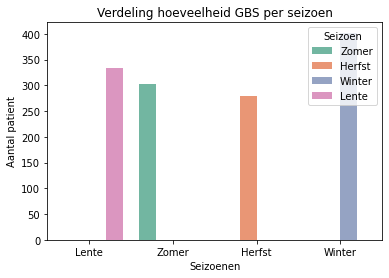

In [390]:
sns.countplot(data = df,x='Seizoen', hue = 'Seizoen',
              order = ['Lente', 'Zomer', 'Herfst', 'Winter'],
              palette='Set2')
plt.title('Verdeling hoeveelheid GBS per seizoen')
plt.xlabel('Seizoenen')
plt.ylabel('Aantal patient')


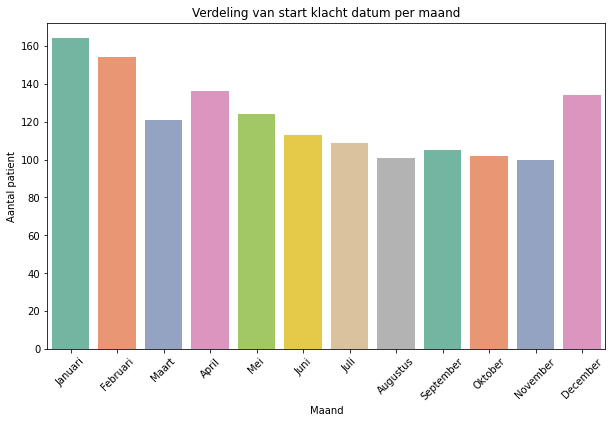

In [82]:
month_counts = pd.Series(df['date_month'].value_counts())
month_names = {
    1.0: 'Januari',
    2.0: 'Februari',
    3.0: 'Maart',
    4.0: 'April',
    5.0: 'Mei',
    6.0: 'Juni',
    7.0: 'Juli',
    8.0: 'Augustus',
    9.0: 'September',
    10.0: 'Oktober',
    11.0: 'November',
    12.0: 'December'
}


month_counts.index = month_counts.index.map(month_names)

plt.figure(figsize=(10, 6))
sns.barplot(x=month_counts.index, y=month_counts.values, palette='Set2',
            order = ['Januari', 'Februari', 'Maart', 'April', 'Mei', 'Juni', 'Juli', 'Augustus', 'September', 'Oktober', 'November', 'December']
)


plt.xlabel('Maand')
plt.ylabel('Aantal patient')
plt.title('Verdeling van start klacht datum per maand')

plt.xticks(rotation=45)
plt.show()



Text(0, 0.5, 'Aantal patient')

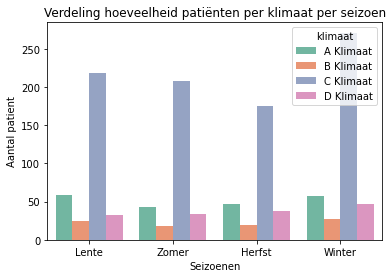

In [389]:
sns.countplot(data = df,x='Seizoen', hue = 'klimaat',
              hue_order=['A Klimaat', 'B Klimaat', 'C Klimaat', 'D Klimaat'],
              order = ['Lente', 'Zomer', 'Herfst', 'Winter'],
              palette='Set2')
plt.title('Verdeling hoeveelheid patiënten per klimaat per seizoen')

plt.xlabel('Seizoenen')
plt.ylabel('Aantal patient')

In [83]:
Klimaat_Seizoen = pd.crosstab(df['klimaat'], df['Seizoen'])

stats.chi2_contingency(Klimaat_Seizoen)

(3.7451420362510364,
 0.9273719105102436,
 9,
 array([[ 46.85372522,  56.13465482,  66.76281613,  49.24880383],
        [ 21.18045113,  25.37593985,  30.18045113,  22.26315789],
        [208.38140807, 249.6582365 , 296.92686261, 219.03349282],
        [ 36.58441558,  43.83116883,  52.12987013,  38.45454545]]))

De chi-kwadraat toets geeft een p-waarde van 0,9237.... dat is hoger dan 0,05. Dus de 0-hypothese wordt bewaard.
De 0 hypothese is dat de 2 variabelen statistisch onafhankelijk zijn.

# NA handling

Eerst kijken hoeveel NA er zijn in de dataset. Om te bepalen welke vorm van NA-handling wordt toegepast

In [84]:
for column, dtype in zip(df.columns, df.isna().sum()):
    print(column, ":", dtype)

Age : 9
Sex : 0
MRC_sum_e : 50
MRC_sum_w1 : 183
CNI_e : 33
CNI_Bulbar_e : 33
CNI_Facial_e : 33
CNI_Oculomotor_e : 33
CNI_w1 : 175
CNI_Bulbar_w1 : 189
CNI_Facial_w1 : 189
CNI_Oculomotor_w1 : 189
Pain_e : 35
Pain_w1 : 171
Sens_deficits_e : 40
Sens_deficits_w1 : 182
Ant_event : 98
Ant_event_GE : 1105
Ant_event_respiratory : 917
Ant_event_vaccination : 1464
Ant_event_other : 1429
GBSDS_e : 40
Able_to_walk_e : 40
GBSDS_w1 : 178
Able_to_walk_w1 : 178
CSF_protein_level : 180
Comorbidity_respiration : 32
Days_between_onset_and_admission : 40
Continent : 0
Country_of_inclusion : 0
Surv_days : 367
Surv_status : 363
Surv_unable_to_walk : 0
Walking_again : 606
Deceased : 0
date_sickness : 37
date_month : 37
country_name : 0
klimaat : 0
landen : 0
halfrond : 0
Seizoen : 37


In [85]:
df = df.dropna(thresh= df.shape[1]-10)
df

,Age,Sex,MRC_sum_e,MRC_sum_w1,CNI_e,CNI_Bulbar_e,CNI_Facial_e,CNI_Oculomotor_e,CNI_w1,CNI_Bulbar_w1,...,Surv_unable_to_walk,Walking_again,Deceased,date_sickness,date_month,country_name,klimaat,landen,halfrond,Seizoen
0,75.0,0,50.0,53.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1,1.0,0,2016-06-16,6.0,Denemarken,C Klimaat,Europa,Noordelijk_halfrond,Zomer
1,22.0,0,50.0,46.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,1.0,0,2017-11-22,11.0,Bangladesh,A Klimaat,Bangladesh,Noordelijk_halfrond,Herfst
2,63.0,0,40.0,53.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,NaN,0,2020-12-28,12.0,Verenigde Staten,D Klimaat,Noord-Amerika,Noordelijk_halfrond,Winter
3,30.0,1,60.0,59.0,1.0,1.0,1.0,1.0,1.0,0.0,...,1,1.0,0,2020-03-30,3.0,Italië,C Klimaat,Europa,Noordelijk_halfrond,Lente
4,48.0,1,39.0,45.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1,NaN,0,2015-12-28,12.0,Verenigd Koninkrijk,C Klimaat,Europa,Noordelijk_halfrond,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1494,69.0,0,42.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,NaN,0,2016-02-12,2.0,Taiwan,C Klimaat,Azië,Noordelijk_halfrond,Winter
1496,66.0,0,54.0,55.0,1.0,1.0,1.0,0.0,0.0,0.0,...,1,1.0,0,2017-02-04,2.0,Nederland,C Klimaat,Europa,Noordelijk_halfrond,Winter
1497,67.0,0,33.0,46.0,1.0,1.0,1.0,0.0,1.0,1.0,...,1,1.0,0,2017-04-30,4.0,Zuid-Afrika,C Klimaat,Anders,Zuidelijk_halfrond,Herfst
1498,35.0,1,1.0,3.0,1.0,1.0,0.0,0.0,1.0,1.0,...,1,1.0,0,2017-10-03,10.0,Argentinië,C Klimaat,Zuid-Amerika,Zuidelijk_halfrond,Lente


In [86]:
for column, dtype in zip(df.columns, df.isna().sum()):
    print(column, ":", dtype)

Age : 3
Sex : 0
MRC_sum_e : 16
MRC_sum_w1 : 12
CNI_e : 0
CNI_Bulbar_e : 0
CNI_Facial_e : 0
CNI_Oculomotor_e : 0
CNI_w1 : 4
CNI_Bulbar_w1 : 18
CNI_Facial_w1 : 18
CNI_Oculomotor_w1 : 18
Pain_e : 4
Pain_w1 : 3
Sens_deficits_e : 8
Sens_deficits_w1 : 11
Ant_event : 83
Ant_event_GE : 967
Ant_event_respiratory : 813
Ant_event_vaccination : 1297
Ant_event_other : 1259
GBSDS_e : 8
Able_to_walk_e : 8
GBSDS_w1 : 10
Able_to_walk_w1 : 10
CSF_protein_level : 154
Comorbidity_respiration : 4
Days_between_onset_and_admission : 7
Continent : 0
Country_of_inclusion : 0
Surv_days : 276
Surv_status : 287
Surv_unable_to_walk : 0
Walking_again : 480
Deceased : 0
date_sickness : 7
date_month : 7
country_name : 0
klimaat : 0
landen : 0
halfrond : 0
Seizoen : 7


In [87]:
df[df['Ant_event'].isna() == False]['Ant_event'].count()

1242

In [88]:
df[df['Ant_event_GE'].isna() == False]['Ant_event_GE'].count()

358

In [89]:
df['Ant_event_GE']

0       1.0
1       NaN
2       NaN
3       NaN
4       1.0
       ... 
1494    NaN
1496    NaN
1497    NaN
1498    NaN
1499    NaN
Name: Ant_event_GE, Length: 1325, dtype: float64

In [90]:
df['Ant_event'].value_counts()

1.0    950
0.0    292
Name: Ant_event, dtype: int64

In [91]:
df['Ant_event_GE'].isna().sum()

967

In [92]:
df['Ant_event_GE'].value_counts()

1.0    358
Name: Ant_event_GE, dtype: int64

In [93]:
df['Ant_event_GE'] = df['Ant_event_GE'].fillna(df['Ant_event'].
                                               where(df['Ant_event'] <2, other=pd.NA).replace(1, 0))

In [94]:
df['Ant_event_GE'].isna().sum()

83

In [95]:
df['Ant_event_GE'].value_counts()


0.0    884
1.0    358
Name: Ant_event_GE, dtype: int64

In [96]:
df['Ant_event_respiratory'] = df['Ant_event_respiratory'].fillna(df['Ant_event'].
                                               where(df['Ant_event'] <2, other=pd.NA).replace(1, 0))

In [97]:
df['Ant_event_vaccination'] = df['Ant_event_vaccination'].fillna(df['Ant_event'].
                                               where(df['Ant_event'] <2, other=pd.NA).replace(1, 0))

In [98]:
df['Ant_event_other'] = df['Ant_event_other'].fillna(df['Ant_event'].
                                               where(df['Ant_event'] <2, other=pd.NA).replace(1, 0))

In [99]:
for column, dtype in zip(df.columns, df.isna().sum()):
    print(column, ":", dtype)

Age : 3
Sex : 0
MRC_sum_e : 16
MRC_sum_w1 : 12
CNI_e : 0
CNI_Bulbar_e : 0
CNI_Facial_e : 0
CNI_Oculomotor_e : 0
CNI_w1 : 4
CNI_Bulbar_w1 : 18
CNI_Facial_w1 : 18
CNI_Oculomotor_w1 : 18
Pain_e : 4
Pain_w1 : 3
Sens_deficits_e : 8
Sens_deficits_w1 : 11
Ant_event : 83
Ant_event_GE : 83
Ant_event_respiratory : 83
Ant_event_vaccination : 83
Ant_event_other : 83
GBSDS_e : 8
Able_to_walk_e : 8
GBSDS_w1 : 10
Able_to_walk_w1 : 10
CSF_protein_level : 154
Comorbidity_respiration : 4
Days_between_onset_and_admission : 7
Continent : 0
Country_of_inclusion : 0
Surv_days : 276
Surv_status : 287
Surv_unable_to_walk : 0
Walking_again : 480
Deceased : 0
date_sickness : 7
date_month : 7
country_name : 0
klimaat : 0
landen : 0
halfrond : 0
Seizoen : 7


In [100]:
df_2  = df[['Able_to_walk_e','Able_to_walk_w1','Surv_unable_to_walk','Walking_again']]

In [101]:
df_2

,Able_to_walk_e,Able_to_walk_w1,Surv_unable_to_walk,Walking_again
0,0.0,0.0,1,1.0
1,0.0,0.0,1,1.0
2,0.0,0.0,1,NaN
3,0.0,1.0,1,1.0
4,0.0,0.0,1,NaN
...,...,...,...,...
1494,0.0,0.0,1,NaN
1496,0.0,0.0,1,1.0
1497,0.0,0.0,1,1.0
1498,0.0,0.0,1,1.0


In [102]:
df_lopers = df_2[df_2['Surv_unable_to_walk'] == 0]

In [103]:
print(df_lopers['Able_to_walk_e'].value_counts(), '\n',
    df_lopers['Able_to_walk_w1'].value_counts(), '\n',
    df_lopers['Surv_unable_to_walk'].value_counts(), '\n',
    'walking_again', df_lopers['Walking_again'].value_counts())


1.0    268
Name: Able_to_walk_e, dtype: int64 
 1.0    268
Name: Able_to_walk_w1, dtype: int64 
 0    270
Name: Surv_unable_to_walk, dtype: int64 
 walking_again Series([], Name: Walking_again, dtype: int64)


In [104]:
df_NietLopers = df_2[df_2['Surv_unable_to_walk'] == 1]

In [105]:
df_NietLopers

,Able_to_walk_e,Able_to_walk_w1,Surv_unable_to_walk,Walking_again
0,0.0,0.0,1,1.0
1,0.0,0.0,1,1.0
2,0.0,0.0,1,NaN
3,0.0,1.0,1,1.0
4,0.0,0.0,1,NaN
...,...,...,...,...
1494,0.0,0.0,1,NaN
1496,0.0,0.0,1,1.0
1497,0.0,0.0,1,1.0
1498,0.0,0.0,1,1.0


In [106]:
print(df['Able_to_walk_e'].value_counts(), '\n',
      df['Able_to_walk_w1'].value_counts())

0.0    982
1.0    335
Name: Able_to_walk_e, dtype: int64 
 0.0    907
1.0    408
Name: Able_to_walk_w1, dtype: int64


In [107]:
df['Able_to_walk_e'] = df['Able_to_walk_e'].fillna(df['Surv_unable_to_walk'].
                                               where(df['Surv_unable_to_walk'] == 0, other=pd.NA).replace(0, 1))

In [108]:
df['Able_to_walk_w1'] = df['Able_to_walk_w1'].fillna(df['Surv_unable_to_walk'].
                                               where(df['Surv_unable_to_walk'] == 0, other=pd.NA).replace(0, 1))

In [109]:
print(df['Able_to_walk_e'].value_counts(), '\n',
      df['Able_to_walk_w1'].value_counts())

0.0    982
1.0    337
Name: Able_to_walk_e, dtype: int64 
 0.0    907
1.0    410
Name: Able_to_walk_w1, dtype: int64


In [110]:
df['Surv_status'] = df['Surv_status'].fillna(0)

In [111]:
for column, dtype in zip(df.columns, df.isna().sum()):
    print(column, ":", dtype)

Age : 3
Sex : 0
MRC_sum_e : 16
MRC_sum_w1 : 12
CNI_e : 0
CNI_Bulbar_e : 0
CNI_Facial_e : 0
CNI_Oculomotor_e : 0
CNI_w1 : 4
CNI_Bulbar_w1 : 18
CNI_Facial_w1 : 18
CNI_Oculomotor_w1 : 18
Pain_e : 4
Pain_w1 : 3
Sens_deficits_e : 8
Sens_deficits_w1 : 11
Ant_event : 83
Ant_event_GE : 83
Ant_event_respiratory : 83
Ant_event_vaccination : 83
Ant_event_other : 83
GBSDS_e : 8
Able_to_walk_e : 6
GBSDS_w1 : 10
Able_to_walk_w1 : 8
CSF_protein_level : 154
Comorbidity_respiration : 4
Days_between_onset_and_admission : 7
Continent : 0
Country_of_inclusion : 0
Surv_days : 276
Surv_status : 0
Surv_unable_to_walk : 0
Walking_again : 480
Deceased : 0
date_sickness : 7
date_month : 7
country_name : 0
klimaat : 0
landen : 0
halfrond : 0
Seizoen : 7


# Toetsen

In [112]:
freq_table = pd.crosstab(df['klimaat'], df['Seizoen']) 
freq_table

Seizoen,Herfst,Lente,Winter,Zomer
klimaat,,,,
A Klimaat,47,58,57,43
B Klimaat,20,24,27,18
C Klimaat,175,218,271,208
D Klimaat,38,33,47,34


In [113]:
df_A = df[df['klimaat'] == 'A Klimaat']
df_B = df[df['klimaat'] == 'B Klimaat']
df_C = df[df['klimaat'] == 'C Klimaat']
df_D = df[df['klimaat'] == 'D Klimaat']

In [114]:
dataframes_klimaat = [df_A, df_B, df_C, df_D]
for i in dataframes_klimaat:
    print(i['klimaat'].value_counts()) 
    

A Klimaat    206
Name: klimaat, dtype: int64
B Klimaat    90
Name: klimaat, dtype: int64
C Klimaat    875
Name: klimaat, dtype: int64
D Klimaat    154
Name: klimaat, dtype: int64


Uit deze code is te zien dat alle klimaten op juiste wijze zijn gesplitst

In [115]:
df_lente = df[df['Seizoen'] == 'Lente']
df_zomer = df[df['Seizoen'] == 'Zomer']
df_herfst = df[df['Seizoen'] == 'Herfst']
df_winter = df[df['Seizoen'] == 'Winter']

In [116]:
dataframes_seizoen = [df_lente, df_zomer, df_herfst, df_winter]
for i in dataframes_seizoen:
    print(i['Seizoen'].value_counts()) 
    

Lente    333
Name: Seizoen, dtype: int64
Zomer    303
Name: Seizoen, dtype: int64
Herfst    280
Name: Seizoen, dtype: int64
Winter    402
Name: Seizoen, dtype: int64


In [117]:
for dateframe in dataframes_klimaat:
    freq_table = pd.crosstab(dateframe['Deceased'], dateframe['Seizoen']) 
    print(freq_table, '\n')
  

Seizoen   Herfst  Lente  Winter  Zomer
Deceased                              
0             44     58      55     40
1              3      0       2      3 

Seizoen   Herfst  Lente  Winter  Zomer
Deceased                              
0             19     24      26     18
1              1      0       1      0 

Seizoen   Herfst  Lente  Winter  Zomer
Deceased                              
0            168    208     261    200
1              7     10      10      8 

Seizoen   Herfst  Lente  Winter  Zomer
Deceased                              
0             38     32      47     32
1              0      1       0      2 



Wat in deze tabel is te zien dat er te weinig waarden apart zijn om de chi-kwadraat toets uit te voeren, daarom wordt voor het geheel de chi-kwadraat en voor C klimaat de test uitgevoerd. Omdat dit geen 2 bij 2 matrices zijn mag de fishers exact toets ook niet worden uitgevoerd

In [118]:
Seizoen_dood = pd.crosstab(df['Seizoen'], df['Deceased'])
stats.chi2_contingency(Seizoen_dood)

(0.7282704121038908,
 0.8665351698920313,
 3,
 array([[269.80273141,  10.19726859],
        [320.87253414,  12.12746586],
        [387.35963581,  14.64036419],
        [291.96509863,  11.03490137]]))

In [119]:
Seizoen_dood = pd.crosstab(df_C['Seizoen'], df_C['Deceased'])
stats.chi2_contingency(Seizoen_dood)

(0.2750069819875797,
 0.9646583492928525,
 3,
 array([[167.97591743,   7.02408257],
        [209.25      ,   8.75      ],
        [260.12270642,  10.87729358],
        [199.65137615,   8.34862385]]))

In [120]:
for dateframe in dataframes_klimaat:
    freq_table = pd.crosstab(dateframe['Surv_status'], dateframe['Seizoen']) 
    print(freq_table, '\n')

Seizoen      Herfst  Lente  Winter  Zomer
Surv_status                              
0.0              11     15      13     11
1.0              33     43      42     29
2.0               3      0       2      3 

Seizoen      Herfst  Lente  Winter  Zomer
Surv_status                              
0.0               7     11       7     10
1.0              12     13      19      8
2.0               1      0       1      0 

Seizoen      Herfst  Lente  Winter  Zomer
Surv_status                              
0.0              52     73      90     81
1.0             116    135     171    119
2.0               7     10      10      8 

Seizoen      Herfst  Lente  Winter  Zomer
Surv_status                              
0.0              14     15      15      5
1.0              24     17      32     27
2.0               0      1       0      2 



Voor de surv_status geldt hetzelfde al voor deceaced

In [121]:
Seizoen_surv_status = pd.crosstab(df['Seizoen'], df['Surv_status'])
stats.chi2_contingency(Seizoen_surv_status)

(3.6084050021635243,
 0.7294954618148062,
 6,
 array([[ 91.35053111, 178.4522003 ,  10.19726859],
        [108.64188164, 212.2306525 ,  12.12746586],
        [131.15326252, 256.20637329,  14.64036419],
        [ 98.85432473, 193.1107739 ,  11.03490137]]))

In [122]:
Seizoen_surv_status = pd.crosstab(df_C['Seizoen'], df_C['Surv_status'])
stats.chi2_contingency(Seizoen_surv_status)

(4.113168019450811,
 0.6613648188238734,
 6,
 array([[ 59.40366972, 108.57224771,   7.02408257],
        [ 74.        , 135.25      ,   8.75      ],
        [ 91.99082569, 168.13188073,  10.87729358],
        [ 70.60550459, 129.04587156,   8.34862385]]))

Ook kan nog worden gekozen om 2 weg te halen dat wordt hieronder gedaan, bij deceased is namelijk ook al gekeken of het overlijden afhankelijk was aan het seizoen

In [123]:
df_survstatus = df
df_A_survstatus = df_A
df_B_survstatus = df_B
df_C_survstatus = df_C
df_D_survstatus = df_D

In [124]:
df_survstatus = df_survstatus.drop(df_survstatus[df_survstatus['Surv_status'] == 2].index)
df_A_survstatus = df_A_survstatus.drop(df_A_survstatus[df_A_survstatus['Surv_status'] == 2].index)
df_B_survstatus = df_B_survstatus.drop(df_B_survstatus[df_B_survstatus['Surv_status'] == 2].index)
df_C_survstatus = df_C_survstatus.drop(df_C_survstatus[df_C_survstatus['Surv_status'] == 2].index)
df_D_survstatus = df_D_survstatus.drop(df_D_survstatus[df_D_survstatus['Surv_status'] == 2].index)

In [125]:
Seizoen_surv_status = pd.crosstab(df_survstatus['Seizoen'], df_survstatus['Surv_status'])
stats.chi2_contingency(Seizoen_surv_status)

(2.887260675949773,
 0.4093359573061873,
 3,
 array([[ 91.07874016, 177.92125984],
        [109.02362205, 212.97637795],
        [131.70866142, 257.29133858],
        [ 98.18897638, 191.81102362]]))

In [126]:
Seizoen_surv_status = pd.crosstab(df_A_survstatus['Seizoen'], df_A_survstatus['Surv_status'])
stats.chi2_contingency(Seizoen_surv_status)

(0.1936874693451049,
 0.9786018652669638,
 3,
 array([[11.16751269, 32.83248731],
        [14.72081218, 43.27918782],
        [13.95939086, 41.04060914],
        [10.15228426, 29.84771574]]))

In [127]:
Seizoen_surv_status = pd.crosstab(df_B_survstatus['Seizoen'], df_B_survstatus['Surv_status'])
stats.chi2_contingency(Seizoen_surv_status)

(4.076967844908129,
 0.253272038079724,
 3,
 array([[ 7.64367816, 11.35632184],
        [ 9.65517241, 14.34482759],
        [10.45977011, 15.54022989],
        [ 7.24137931, 10.75862069]]))

In [128]:
Seizoen_surv_status = pd.crosstab(df_C_survstatus['Seizoen'], df_C_survstatus['Surv_status'])
stats.chi2_contingency(Seizoen_surv_status)

(3.8336661255101143,
 0.27999440609583726,
 3,
 array([[ 59.41218638, 108.58781362],
        [ 73.55794504, 134.44205496],
        [ 92.30107527, 168.69892473],
        [ 70.72879331, 129.27120669]]))

In [129]:
Seizoen_surv_status = pd.crosstab(df_D_survstatus['Seizoen'], df_D_survstatus['Surv_status'])
stats.chi2_contingency(Seizoen_surv_status)

(7.446554394154078,
 0.05894771770740127,
 3,
 array([[12.4966443 , 25.5033557 ],
        [10.52348993, 21.47651007],
        [15.45637584, 31.54362416],
        [10.52348993, 21.47651007]]))

Seizoen en surv_status zijn statistisch onafhankelijk

Algemene CNI

In [130]:
for dateframe in dataframes_klimaat:
    freq_table = pd.crosstab(dateframe['CNI_e'], dateframe['Seizoen']) 
    print(freq_table, '\n')

Seizoen  Herfst  Lente  Winter  Zomer
CNI_e                                
0.0          30     27      30     20
1.0          17     31      27     23 

Seizoen  Herfst  Lente  Winter  Zomer
CNI_e                                
0.0          13     15      14     12
1.0           7      9      13      6 

Seizoen  Herfst  Lente  Winter  Zomer
CNI_e                                
0.0          83    111     149    112
1.0          92    106     121     96
2.0           0      1       1      0 

Seizoen  Herfst  Lente  Winter  Zomer
CNI_e                                
0.0          19     14      28     21
1.0          19     18      19     13
2.0           0      1       0      0 



In [131]:
for dateframe in dataframes_klimaat:
    freq_table = pd.crosstab(dateframe['CNI_w1'], dateframe['Seizoen']) 
    print(freq_table, '\n')

Seizoen  Herfst  Lente  Winter  Zomer
CNI_w1                               
0.0          29     26      32     19
1.0          16     29      24     24
2.0           1      3       1      0 

Seizoen  Herfst  Lente  Winter  Zomer
CNI_w1                               
0.0          15     13      15     13
1.0           5     11      12      5 

Seizoen  Herfst  Lente  Winter  Zomer
CNI_w1                               
0.0          87    107     144    112
1.0          84    107     124     96
2.0           3      2       3      0 

Seizoen  Herfst  Lente  Winter  Zomer
CNI_w1                               
0.0          20     17      26     20
1.0          18     15      21     14
2.0           0      1       0      0 



CNI Bulbular

In [132]:
for dateframe in dataframes_klimaat:
    freq_table = pd.crosstab(dateframe['CNI_Bulbar_e'], dateframe['Seizoen']) 
    print(freq_table, '\n')

Seizoen       Herfst  Lente  Winter  Zomer
CNI_Bulbar_e                              
0.0               38     40      40     28
1.0                9     18      17     15 

Seizoen       Herfst  Lente  Winter  Zomer
CNI_Bulbar_e                              
0.0               16     19      21     12
1.0                4      5       6      6 

Seizoen       Herfst  Lente  Winter  Zomer
CNI_Bulbar_e                              
0.0              118    165     206    163
1.0               57     52      64     45
2.0                0      1       1      0 

Seizoen       Herfst  Lente  Winter  Zomer
CNI_Bulbar_e                              
0.0               30     25      36     27
1.0                8      7      11      7
2.0                0      1       0      0 



In [133]:
for dateframe in dataframes_klimaat:
    freq_table = pd.crosstab(dateframe['CNI_Bulbar_w1'], dateframe['Seizoen']) 
    print(freq_table, '\n')

Seizoen        Herfst  Lente  Winter  Zomer
CNI_Bulbar_w1                              
0.0                37     40      40     29
1.0                 8     15      16     14 



Seizoen        Herfst  Lente  Winter  Zomer
CNI_Bulbar_w1                              
0.0                16     19      22     15
1.0                 4      5       5      3 

Seizoen        Herfst  Lente  Winter  Zomer
CNI_Bulbar_w1                              
0.0               125    164     217    166
1.0                46     50      51     42 

Seizoen        Herfst  Lente  Winter  Zomer
CNI_Bulbar_w1                              
0.0                31     24      36     27
1.0                 7      8      11      7 



CNI facial

In [134]:
for dateframe in dataframes_klimaat:
    freq_table = pd.crosstab(dateframe['CNI_Facial_e'], dateframe['Seizoen']) 
    print(freq_table, '\n')

Seizoen       Herfst  Lente  Winter  Zomer
CNI_Facial_e                              
0.0               37     36      40     30
1.0               10     22      17     13 

Seizoen       Herfst  Lente  Winter  Zomer
CNI_Facial_e                              
0.0               15     22      22     15
1.0                5      2       5      3 

Seizoen       Herfst  Lente  Winter  Zomer
CNI_Facial_e                              
0.0              122    155     201    147
1.0               53     62      69     61
2.0                0      1       1      0 

Seizoen       Herfst  Lente  Winter  Zomer
CNI_Facial_e                              
0.0               23     26      35     25
1.0               15      6      12      9
2.0                0      1       0      0 



In [135]:
for dateframe in dataframes_klimaat:
    freq_table = pd.crosstab(dateframe['CNI_Facial_w1'], dateframe['Seizoen']) 
    print(freq_table, '\n')

Seizoen        Herfst  Lente  Winter  Zomer
CNI_Facial_w1                              
0.0                34     31      39     28
1.0                11     24      17     15 

Seizoen        Herfst  Lente  Winter  Zomer
CNI_Facial_w1                              
0.0                16     19      18     16
1.0                 4      5       9      2 

Seizoen        Herfst  Lente  Winter  Zomer
CNI_Facial_w1                              
0.0               118    145     181    144
1.0                53     69      87     64 

Seizoen        Herfst  Lente  Winter  Zomer
CNI_Facial_w1                              
0.0                22     26      31     26
1.0                16      6      16      8 



CNI Oculomotor

In [136]:
for dateframe in dataframes_klimaat:
    freq_table = pd.crosstab(dateframe['CNI_Oculomotor_e'], dateframe['Seizoen']) 
    print(freq_table, '\n')

Seizoen           Herfst  Lente  Winter  Zomer
CNI_Oculomotor_e                              
0.0                   41     50      49     38
1.0                    6      8       8      5 

Seizoen           Herfst  Lente  Winter  Zomer
CNI_Oculomotor_e                              
0.0                   20     19      23     15
1.0                    0      5       4      3 

Seizoen           Herfst  Lente  Winter  Zomer
CNI_Oculomotor_e                              
0.0                  154    178     223    172
1.0                   21     39      47     36
2.0                    0      1       1      0 

Seizoen           Herfst  Lente  Winter  Zomer
CNI_Oculomotor_e                              
0.0                   36     22      41     29
1.0                    2     10       6      5
2.0                    0      1       0      0 



In [137]:
for dateframe in dataframes_klimaat:
    freq_table = pd.crosstab(dateframe['CNI_Oculomotor_w1'], dateframe['Seizoen']) 
    print(freq_table, '\n')

Seizoen            Herfst  Lente  Winter  Zomer
CNI_Oculomotor_w1                              
0.0                    39     48      49     36
1.0                     6      7       7      7 

Seizoen            Herfst  Lente  Winter  Zomer
CNI_Oculomotor_w1                              
0.0                    20     18      24     16
1.0                     0      6       3      2 

Seizoen            Herfst  Lente  Winter  Zomer
CNI_Oculomotor_w1                              
0.0                   149    177     223    172
1.0                    22     37      45     36 

Seizoen            Herfst  Lente  Winter  Zomer
CNI_Oculomotor_w1                              
0.0                    35     25      42     28
1.0                     3      7       5      6 



In deze voorbeelden is te zien dat voor alle CNI evenementen niet genoeg waarden zijn bij de waarden van 2.0, nou is optie 2 niet mogelijk te bepalen, wat positief zou kunnen uitpakken. daarom worden die uit de dataset gehaald nu. Op de agemene CNI na komt de waarde 2.0 ook niet eens voor in dataset.

In [138]:
df_CNI = df
df_A_CNI = df_A
df_B_CNI = df_B
df_C_CNI = df_C
df_D_CNI = df_D
CNI_var = ['CNI_e', 'CNI_w1', 'CNI_Bulbar_e', 'CNI_Facial_e', 'CNI_Oculomotor_e']

In [139]:
for var in CNI_var:
    df_CNI = df_CNI.drop(df_CNI[df_CNI[var] == 2].index)
    df_A_CNI = df_A_CNI.drop(df_A_CNI[df_A_CNI[var] == 2].index)
    df_B_CNI = df_B_CNI.drop(df_B_CNI[df_B_CNI[var] == 2].index)
    df_C_CNI = df_C_CNI.drop(df_C_CNI[df_C_CNI[var] == 2].index)
    df_D_CNI = df_D_CNI.drop(df_D_CNI[df_D_CNI[var] == 2].index)

In [140]:
df_CNI['CNI_w1'].unique()

array([ 1.,  0., nan])

In [141]:
dataframes_CNI = [df_CNI, df_A_CNI, df_B_CNI, df_C_CNI, df_D_CNI]

In [142]:
#for dateframe in dataframes_CNI:
#    freq_table = pd.crosstab(dateframe['CNI_Oculomotor_e'], dateframe['Seizoen']) 
#   print(freq_table, '\n')

In [143]:
CNI_var_e = ['CNI_e', 'CNI_Bulbar_e', 'CNI_Facial_e', 'CNI_Oculomotor_e']
CNI_var_w1 = ['CNI_w1', 'CNI_Bulbar_w1', 'CNI_Facial_w1', 'CNI_Oculomotor_w1']

In [144]:
for var in CNI_var_e:
    print(var, '\n')
    for dataframe in dataframes_CNI:
        Seizoen_CNI = pd.crosstab(dataframe['Seizoen'], dataframe[var])
        print(stats.chi2_contingency(Seizoen_CNI))

CNI_e 

(2.187129110001867, 0.534487982644873, 3, array([[146.90322581, 129.09677419],
       [173.51612903, 152.48387097],
       [211.30645161, 185.69354839],
       [161.27419355, 141.72580645]]))
(3.297331085253876, 0.3480142807496441, 3, array([[24.15 , 21.85 ],
       [28.875, 26.125],
       [29.4  , 26.6  ],
       [22.575, 20.425]]))
(1.3420198902606308, 0.7191800379842723, 3, array([[12.13483146,  7.86516854],
       [14.56179775,  9.43820225],
       [16.38202247, 10.61797753],
       [10.92134831,  7.07865169]]))
(2.5914932955730317, 0.45898283415090624, 3, array([[ 90.19025522,  81.80974478],
       [112.73781903, 102.26218097],
       [140.00464037, 126.99535963],
       [109.06728538,  98.93271462]]))
(3.0088533862361535, 0.39026217144039593, 3, array([[20.63576159, 17.36423841],
       [17.37748344, 14.62251656],
       [25.52317881, 21.47682119],
       [18.46357616, 15.53642384]]))
CNI_Bulbar_e 

(1.2236845231097258, 0.7473295689518629, 3, array([[206.89400922,  69.10

Hieruit is te zien dat CNI_Oculomotor_e voor alle klimaten samen en voor D klimaat statistisch significant afwijkt

In [145]:
Seizoen_CNI = pd.crosstab(df_CNI['Seizoen'], df_CNI['CNI_Oculomotor_e'])
stats.chi2_contingency(Seizoen_CNI)

(9.2924102271231,
 0.025645467673540617,
 3,
 array([[232.96774194,  43.03225806],
        [275.17204301,  50.82795699],
        [335.10215054,  61.89784946],
        [255.75806452,  47.24193548]]))

In [146]:
Seizoen_CNI = pd.crosstab(df_D_CNI['Seizoen'], df_D_CNI['CNI_Oculomotor_e'])
stats.chi2_contingency(Seizoen_CNI)

(9.512319016409421,
 0.023200667266433474,
 3,
 array([[32.21192053,  5.78807947],
        [27.12582781,  4.87417219],
        [39.8410596 ,  7.1589404 ],
        [28.82119205,  5.17880795]]))

Week 1

In [147]:
for var in CNI_var_w1:
    print(var, '\n')
    for dataframe in dataframes_CNI:
        Seizoen_CNI = pd.crosstab(dataframe['Seizoen'], dataframe[var])
        print(stats.chi2_contingency(Seizoen_CNI))

CNI_w1 

(2.0529971173149066, 0.5614801316685369, 3, array([[146.28813559, 127.71186441],
       [172.98305085, 151.01694915],
       [211.95762712, 185.04237288],
       [161.77118644, 141.22881356]]))
(4.814745438108826, 0.1858759746679059, 3, array([[23.96984925, 21.03015075],
       [29.29648241, 25.70351759],
       [29.82914573, 26.17085427],
       [22.90452261, 20.09547739]]))


(3.3344231000481006, 0.34288025497993363, 3, array([[12.58426966,  7.41573034],
       [15.1011236 ,  8.8988764 ],
       [16.98876404, 10.01123596],
       [11.3258427 ,  6.6741573 ]]))
(1.0483870357977292, 0.7895459410802105, 3, array([[ 89.18277066,  81.81722934],
       [111.08731083, 101.91268917],
       [139.25029104, 127.74970896],
       [108.47962747,  99.52037253]]))
(0.33423356868520715, 0.9534665755985159, 3, array([[20.88741722, 17.11258278],
       [17.58940397, 14.41059603],
       [25.83443709, 21.16556291],
       [18.68874172, 15.31125828]]))
CNI_Bulbar_w1 

(1.3628399525119614, 0.7142678945727408, 3, array([[212.3605547 ,  61.6394453 ],
       [251.11248074,  72.88751926],
       [307.69029276,  89.30970724],
       [234.8366718 ,  68.1633282 ]]))
(2.697666026025616, 0.4406240745147766, 3, array([[33.01507538, 11.98492462],
       [40.35175879, 14.64824121],
       [41.08542714, 14.91457286],
       [31.54773869, 11.45226131]]))
(0.13202690026627947, 0.9877347644224

Echter is dit niet meer het geval na week 1

Post hoc voor CNI_Oculomotor_e met hele dataframe en klimaat D

Post hoc voor CNI

In [148]:
df_CNI_LenZom = df_CNI[(df_CNI['Seizoen'] == 'Lente') | (df_CNI['Seizoen'] == 'Zomer')]
df_CNI_LenHer = df_CNI[(df_CNI['Seizoen'] == 'Lente') | (df_CNI['Seizoen'] == 'Herfst')]
df_CNI_LenWin = df_CNI[(df_CNI['Seizoen'] == 'Lente') | (df_CNI['Seizoen'] == 'Winter')]
df_CNI_ZomHer = df_CNI[(df_CNI['Seizoen'] == 'Zomer') | (df_CNI['Seizoen'] == 'Herfst')]
df_CNI_ZomWin = df_CNI[(df_CNI['Seizoen'] == 'Zomer') | (df_CNI['Seizoen'] == 'Winter')]
df_CNI_HerWin = df_CNI[(df_CNI['Seizoen'] == 'Herfst') | (df_CNI['Seizoen'] == 'Winter')]

df_D_CNI_LenZom = df_D_CNI[(df_D_CNI['Seizoen'] == 'Lente') | (df_D_CNI['Seizoen'] == 'Zomer')]
df_D_CNI_LenHer = df_D_CNI[(df_D_CNI['Seizoen'] == 'Lente') | (df_D_CNI['Seizoen'] == 'Herfst')]
df_D_CNI_LenWin = df_D_CNI[(df_D_CNI['Seizoen'] == 'Lente') | (df_D_CNI['Seizoen'] == 'Winter')]
df_D_CNI_ZomHer = df_D_CNI[(df_D_CNI['Seizoen'] == 'Zomer') | (df_D_CNI['Seizoen'] == 'Herfst')]
df_D_CNI_ZomWin = df_D_CNI[(df_D_CNI['Seizoen'] == 'Zomer') | (df_D_CNI['Seizoen'] == 'Winter')]
df_D_CNI_HerWin = df_D_CNI[(df_D_CNI['Seizoen'] == 'Herfst') | (df_D_CNI['Seizoen'] == 'Winter')]



Post hoc hele dataset

In [149]:
Seizoen_CNI = pd.crosstab(df_CNI_LenZom['Seizoen'], df_CNI_LenZom['CNI_Oculomotor_e'])
stats.chi2_contingency(Seizoen_CNI)

(0.6907941834937221,
 0.4058943807836204,
 1,
 array([[268.47058824,  57.52941176],
        [249.52941176,  53.47058824]]))

In [150]:
Seizoen_CNI = pd.crosstab(df_CNI_LenHer['Seizoen'], df_CNI_LenHer['CNI_Oculomotor_e'])
stats.chi2_contingency(Seizoen_CNI)

(8.570753507358903,
 0.00341605751202755,
 1,
 array([[234.73754153,  41.26245847],
        [277.26245847,  48.73754153]]))

In [151]:
Seizoen_CNI = pd.crosstab(df_CNI_LenWin['Seizoen'], df_CNI_LenWin['CNI_Oculomotor_e'])
stats.chi2_contingency(Seizoen_CNI)

(0.8527079149236981,
 0.35578740883556814,
 1,
 array([[269.18672199,  56.81327801],
        [327.81327801,  69.18672199]]))

In [152]:
Seizoen_CNI = pd.crosstab(df_CNI_ZomHer['Seizoen'], df_CNI_ZomHer['CNI_Oculomotor_e'])
stats.chi2_contingency(Seizoen_CNI)

(4.042137248897863,
 0.04437758628676087,
 1,
 array([[239.29533679,  36.70466321],
        [262.70466321,  40.29533679]]))

In [153]:
Seizoen_CNI = pd.crosstab(df_CNI_ZomWin['Seizoen'], df_CNI_ZomWin['CNI_Oculomotor_e'])
stats.chi2_contingency(Seizoen_CNI)

(0.0,
 1.0,
 1,
 array([[332.91285714,  64.08714286],
        [254.08714286,  48.91285714]]))

In [154]:
Seizoen_CNI = pd.crosstab(df_CNI_HerWin['Seizoen'], df_CNI_HerWin['CNI_Oculomotor_e'])
stats.chi2_contingency(Seizoen_CNI)

(4.433477357326408,
 0.03524064043527041,
 1,
 array([[238.27043091,  37.72956909],
        [342.72956909,  54.27043091]]))

Hieruit is te halen dat de herfst de lage p waarde gaf

Na bonferoni correctie is te concluderen dat het niet meer statistisch significant is

Post hoc voor klimaat D

In [155]:
Seizoen_CNI = pd.crosstab(df_D_CNI_LenZom['Seizoen'], df_D_CNI_LenZom['CNI_Oculomotor_e'])
stats.chi2_contingency(Seizoen_CNI)

(1.7135164359861592,
 0.1905297658210512,
 1,
 array([[24.72727273,  7.27272727],
        [26.27272727,  7.72727273]]))

In [156]:
Seizoen_CNI = pd.crosstab(df_D_CNI_LenHer['Seizoen'], df_D_CNI_LenHer['CNI_Oculomotor_e'])
stats.chi2_contingency(Seizoen_CNI)

(6.530822273895947,
 0.0106020934474967,
 1,
 array([[31.48571429,  6.51428571],
        [26.51428571,  5.48571429]]))

In [157]:
Seizoen_CNI = pd.crosstab(df_D_CNI_LenWin['Seizoen'], df_D_CNI_LenWin['CNI_Oculomotor_e'])
stats.chi2_contingency(Seizoen_CNI)

(2.9641180067439206,
 0.08513087194924716,
 1,
 array([[25.51898734,  6.48101266],
        [37.48101266,  9.51898734]]))

In [158]:
Seizoen_CNI = pd.crosstab(df_D_CNI_ZomHer['Seizoen'], df_D_CNI_ZomHer['CNI_Oculomotor_e'])
stats.chi2_contingency(Seizoen_CNI)

(0.9058483312353283,
 0.3412183836565774,
 1,
 array([[34.30555556,  3.69444444],
        [30.69444444,  3.30555556]]))

In [159]:
Seizoen_CNI = pd.crosstab(df_D_CNI_ZomWin['Seizoen'], df_D_CNI_ZomWin['CNI_Oculomotor_e'])
stats.chi2_contingency(Seizoen_CNI)

(0.0,
 1.0,
 1,
 array([[40.61728395,  6.38271605],
        [29.38271605,  4.61728395]]))

In [160]:
Seizoen_CNI = pd.crosstab(df_D_CNI_HerWin['Seizoen'], df_D_CNI_HerWin['CNI_Oculomotor_e'])
stats.chi2_contingency(Seizoen_CNI)

(0.6468430960137288,
 0.42124362140187777,
 1,
 array([[34.42352941,  3.57647059],
        [42.57647059,  4.42352941]]))

Hier is te zien dat dat alleen het geval is tussen de herfst en de lente

Na bonferoni correctie is te concluderen dat het niet meer statistisch significant is

Ant event variabelen testen

In [161]:
for dateframe in dataframes_klimaat:
    freq_table = pd.crosstab(dateframe['Ant_event'], dateframe['Seizoen']) 
    print(freq_table, '\n')

Seizoen    Herfst  Lente  Winter  Zomer
Ant_event                              
0.0             8     19      13      6
1.0            31     37      42     35 

Seizoen    Herfst  Lente  Winter  Zomer
Ant_event                              
0.0             3      4       6      6
1.0            16     17      19     11 

Seizoen    Herfst  Lente  Winter  Zomer
Ant_event                              
0.0            40     41      61     54
1.0           128    165     192    140 

Seizoen    Herfst  Lente  Winter  Zomer
Ant_event                              
0.0             3      6      10     11
1.0            32     25      33     22 



Voor klimaat B en D zijn niet genoeg waarden, daarom worden de testen gedaan voor de datasets van alle klimate, klimaat A en klimaat C

In [162]:
Seizoen_Ant_event = pd.crosstab(df['Seizoen'], df['Ant_event'])
stats.chi2_contingency(Seizoen_Ant_event)

(3.3967431318866286,
 0.33440317301764083,
 3,
 array([[ 61.44902913, 199.55097087],
        [ 73.92718447, 240.07281553],
        [ 88.52427184, 287.47572816],
        [ 67.09951456, 217.90048544]]))

In [163]:
Seizoen_Ant_event = pd.crosstab(df_A['Seizoen'], df_A['Ant_event'])
stats.chi2_contingency(Seizoen_Ant_event)

(5.24897725965238,
 0.15444765405050956,
 3,
 array([[ 9.39267016, 29.60732984],
        [13.48691099, 42.51308901],
        [13.2460733 , 41.7539267 ],
        [ 9.87434555, 31.12565445]]))

In [164]:
Seizoen_Ant_event = pd.crosstab(df_C['Seizoen'], df_C['Ant_event'])
stats.chi2_contingency(Seizoen_Ant_event)

(3.470480276210917,
 0.3246109601569913,
 3,
 array([[ 40.10718636, 127.89281364],
        [ 49.17904994, 156.82095006],
        [ 60.39951279, 192.60048721],
        [ 46.31425091, 147.68574909]]))

Statistisch onafhankelijk in elk klimaat

In [165]:
for dateframe in dataframes_klimaat:
    freq_table = pd.crosstab(dateframe['Ant_event_GE'], dateframe['Seizoen']) 
    print(freq_table, '\n')

Seizoen       Herfst  Lente  Winter  Zomer
Ant_event_GE                              
0.0               24     43      36     26
1.0               15     13      19     15 

Seizoen       Herfst  Lente  Winter  Zomer
Ant_event_GE                              
0.0               12     17      17     10
1.0                7      4       8      7

 

Seizoen       Herfst  Lente  Winter  Zomer
Ant_event_GE                              
0.0              120    145     184    153
1.0               48     61      69     41 

Seizoen       Herfst  Lente  Winter  Zomer
Ant_event_GE                              
0.0               22     19      27     26
1.0               13     12      16      7 



Voor klimaat B zijn niet genoeg waarden, daarom worden de testen gedaan voor de datasets van alle klimate, klimaat A, klimaat C en klimaat D

In [166]:
Seizoen_Ant_event = pd.crosstab(df['Seizoen'], df['Ant_event_GE'])
stats.chi2_contingency(Seizoen_Ant_event)

(3.8272377846536627,
 0.28073377635146896,
 3,
 array([[186.03640777,  74.96359223],
        [223.81391586,  90.18608414],
        [268.00647249, 107.99352751],
        [203.14320388,  81.85679612]]))

In [167]:
Seizoen_Ant_event = pd.crosstab(df_A['Seizoen'], df_A['Ant_event_GE'])
stats.chi2_contingency(Seizoen_Ant_event)

(3.251610660014362,
 0.35443452241451034,
 3,
 array([[26.34031414, 12.65968586],
        [37.82198953, 18.17801047],
        [37.14659686, 17.85340314],
        [27.69109948, 13.30890052]]))

In [168]:
Seizoen_Ant_event = pd.crosstab(df_C['Seizoen'], df_C['Ant_event_GE'])
stats.chi2_contingency(Seizoen_Ant_event)

(4.308629049527979,
 0.23000860089740766,
 3,
 array([[123.1863581 ,  44.8136419 ],
        [151.0499391 ,  54.9500609 ],
        [185.51278928,  67.48721072],
        [142.25091352,  51.74908648]]))

In [169]:
Seizoen_Ant_event = pd.crosstab(df_D['Seizoen'], df_D['Ant_event_GE'])
stats.chi2_contingency(Seizoen_Ant_event)

(3.068920861513158,
 0.381120521509981,
 3,
 array([[23.16901408, 11.83098592],
        [20.52112676, 10.47887324],
        [28.46478873, 14.53521127],
        [21.84507042, 11.15492958]]))

Statistisch onafhankelijk in elk klimaat

In [170]:
for dateframe in dataframes_klimaat:
    freq_table = pd.crosstab(dateframe['Ant_event_respiratory'], dateframe['Seizoen']) 
    print(freq_table, '\n')

Seizoen                Herfst  Lente  Winter  Zomer
Ant_event_respiratory                              
0.0                        25     35      40     25
1.0                        14     21      15     16 

Seizoen                Herfst  Lente  Winter  Zomer
Ant_event_respiratory                              
0.0                        11     11      13     14
1.0                         8     10      12      3 

Seizoen                Herfst  Lente  Winter  Zomer
Ant_event_respiratory                              
0.0                        97    114     141    113
1.0                        71     92     112     81 

Seizoen                Herfst  Lente  Winter  Zomer
Ant_event_respiratory                              
0.0                        18     22      28     19
1.0                        17      9      15     14 



Voor klimaat B zijn niet genoeg waarden, daarom worden de testen gedaan voor de datasets van alle klimate, klimaat A, klimaat C en klimaat D

In [171]:
Seizoen_Ant_event = pd.crosstab(df['Seizoen'], df['Ant_event_respiratory'])
stats.chi2_contingency(Seizoen_Ant_event)

(0.36380668650084336,
 0.9476133879738914,
 3,
 array([[153.30582524, 107.69417476],
        [184.4368932 , 129.5631068 ],
        [220.85436893, 155.14563107],
        [167.40291262, 117.59708738]]))

In [172]:
Seizoen_Ant_event = pd.crosstab(df_A['Seizoen'], df_A['Ant_event_respiratory'])
stats.chi2_contingency(Seizoen_Ant_event)

(1.897762991504676,
 0.5938950499167601,
 3,
 array([[25.52356021, 13.47643979],
        [36.64921466, 19.35078534],
        [35.9947644 , 19.0052356 ],
        [26.83246073, 14.16753927]]))

In [173]:
Seizoen_Ant_event = pd.crosstab(df_C['Seizoen'], df_C['Ant_event_respiratory'])
stats.chi2_contingency(Seizoen_Ant_event)

(0.5134594087318813,
 0.9159246431134281,
 3,
 array([[ 95.15225335,  72.84774665],
        [116.67478685,  89.32521315],
        [143.29476248, 109.70523752],
        [109.87819732,  84.12180268]]))

In [174]:
Seizoen_Ant_event = pd.crosstab(df_D['Seizoen'], df_D['Ant_event_respiratory'])
stats.chi2_contingency(Seizoen_Ant_event)

(3.1149113764076586,
 0.37424519206613077,
 3,
 array([[21.44366197, 13.55633803],
        [18.99295775, 12.00704225],
        [26.34507042, 16.65492958],
        [20.21830986, 12.78169014]]))

Bij alle klimaten is het statistisch onafhankelijk 

In [175]:
for dateframe in dataframes_klimaat:
    freq_table = pd.crosstab(dateframe['Ant_event_vaccination'], dateframe['Seizoen']) 
    print(freq_table, '\n')

Seizoen                Herfst  Lente  Winter  Zomer
Ant_event_vaccination                              
0.0                        38     54      54     41
1.0                         1      2       1      0 

Seizoen                Herfst  Lente  Winter  Zomer
Ant_event_vaccination                              
0.0                        19     18      25     17
1.0                         0      3       0      0 

Seizoen                Herfst  Lente  Winter  Zomer
Ant_event_vaccination                              
0.0                       166    202     247    186
1.0                         2      4       6      8 

Seizoen                Herfst  Lente  Winter  Zomer
Ant_event_vaccination                              
0.0                        35     30      43     33
1.0                         0      1       0      0 



Zelfs alles samen is het niet genoeg waarden voor een chi-kwadraat toets :(

In [176]:
for dateframe in dataframes_klimaat:
    freq_table = pd.crosstab(dateframe['Ant_event_other'], dateframe['Seizoen']) 
    print(freq_table, '\n')

Seizoen          Herfst  Lente  Winter  Zomer
Ant_event_other                              
0.0                  38     54      48     36
1.0                   1      2       7      5 

Seizoen          Herfst  Lente  Winter  Zomer
Ant_event_other                              
0.0                  17     20      25     16
1.0                   2      1       0      1 

Seizoen          Herfst  Lente  Winter  Zomer
Ant_event_other                              
0.0                 160    195     244    183
1.0                   8     11       9     11 

Seizoen          Herfst  Lente  Winter  Zomer
Ant_event_other                              
0.0                  33     28      41     32
1.0                   2      3       2      1 



Alleen C heeft genoeg waarden, dus worden chi-kwadraat toetsen voor de hele dataset en voor het C klimaat uitgevoerd

In [177]:
Seizoen_Ant_event = pd.crosstab(df['Seizoen'], df['Ant_event_other'])
stats.chi2_contingency(Seizoen_Ant_event)

(0.8341618289150069,
 0.841279722287461,
 3,
 array([[247.0631068 ,  13.9368932 ],
        [297.23300971,  16.76699029],
        [355.9223301 ,  20.0776699 ],
        [269.7815534 ,  15.2184466 ]]))

In [178]:
Seizoen_Ant_event = pd.crosstab(df_C['Seizoen'], df_C['Ant_event_other'])
stats.chi2_contingency(Seizoen_Ant_event)

(1.3168244943354948,
 0.7251418637629603,
 3,
 array([[160.01948843,   7.98051157],
        [196.21437272,   9.78562728],
        [240.9817296 ,  12.0182704 ],
        [184.78440926,   9.21559074]]))

Statistisch onafhankelijk

#### Able_to_walk_e

In [179]:
for dateframe in dataframes_klimaat:
    freq_table = pd.crosstab(dateframe['Able_to_walk_e'], dateframe['Seizoen']) 
    print(freq_table, '\n')

Seizoen         Herfst  Lente  Winter  Zomer
Able_to_walk_e                              
0.0                 38     49      53     38
1.0                  9      9       4      5 

Seizoen         Herfst  Lente  Winter  Zomer
Able_to_walk_e                              
0.0                 15     12      21      9
1.0                  4     11       6      9 



Seizoen         Herfst  Lente  Winter  Zomer
Able_to_walk_e                              
0.0                126    158     198    139
1.0                 48     59      72     69 

Seizoen         Herfst  Lente  Winter  Zomer
Able_to_walk_e                              
0.0                 29     24      39     28
1.0                  9      9       7      6 



In [180]:
Seizoen_Able_to_walk_e = pd.crosstab(df['Able_to_walk_e'], df['Seizoen'])
stats.chi2_contingency(Seizoen_Able_to_walk_e)

(4.81494762415157,
 0.18586003710827367,
 3,
 array([[206.80487805, 246.23170732, 297.56097561, 225.40243902],
        [ 71.19512195,  84.76829268, 102.43902439,  77.59756098]]))

In [181]:
df_B_Able_to_walk_e = pd.crosstab(df_B['Able_to_walk_e'], df_B['Seizoen'])
stats.chi2_contingency(df_B_Able_to_walk_e)

(7.04439559998394,
 0.07049611519687934,
 3,
 array([[12.44827586, 15.06896552, 17.68965517, 11.79310345],
        [ 6.55172414,  7.93103448,  9.31034483,  6.20689655]]))

In [182]:
df_C_Able_to_walk_e = pd.crosstab(df_C['Able_to_walk_e'], df_C['Seizoen'])
stats.chi2_contingency(df_C_Able_to_walk_e)

(2.925718813608853,
 0.4032202346996997,
 3,
 array([[124.3429229 , 155.07134638, 192.94591484, 148.63981588],
        [ 49.6570771 ,  61.92865362,  77.05408516,  59.36018412]]))

In [183]:
df_D_Able_to_walk_e = pd.crosstab(df_D['Able_to_walk_e'], df_D['Seizoen'])
stats.chi2_contingency(df_D_Able_to_walk_e)

(2.1202901938941827,
 0.5478188380239974,
 3,
 array([[30.1986755 , 26.22516556, 36.55629139, 27.01986755],
        [ 7.8013245 ,  6.77483444,  9.44370861,  6.98013245]]))

#### Able_to_walk_w1

In [184]:
for dateframe in dataframes_klimaat:
    freq_table = pd.crosstab(dateframe['Able_to_walk_w1'], dateframe['Seizoen']) 
    print(freq_table, '\n')

Seizoen          Herfst  Lente  Winter  Zomer
Able_to_walk_w1                              
0.0                  37     39      50     35
1.0                  10     18       7      8 

Seizoen          Herfst  Lente  Winter  Zomer
Able_to_walk_w1                              
0.0                  15     12      18      8
1.0                   5     12       9      9 



Seizoen          Herfst  Lente  Winter  Zomer
Able_to_walk_w1                              
0.0                 123    145     183    136
1.0                  52     72      86     70 

Seizoen          Herfst  Lente  Winter  Zomer
Able_to_walk_w1                              
0.0                  23     22      34     23
1.0                  14     11      13     11 



In [185]:
Seizoen_Able_to_walk_w1 = pd.crosstab(df['Able_to_walk_w1'], df['Seizoen'])
stats.chi2_contingency(Seizoen_Able_to_walk_w1)

(3.3590834681264,
 0.3395036202025446,
 3,
 array([[192.31832061, 228.16259542, 275.72519084, 206.79389313],
        [ 86.68167939, 102.83740458, 124.27480916,  93.20610687]]))

Seizoen    Herfst  Lente  Winter  Zomer
MRC_sum_e                              
0.0             1      5       2      2
1.0             0      2       3      1
2.0             0      0       0      1
3.0             1      0       4      0
4.0             1      0       1      0
6.0             1      0       0      1
7.0             0      2       0      0
10.0            0      0       0      1
12.0            0      0       1      0
14.0            1      1       0      0
16.0            0      0       1      1
18.0            1      0       1      2
20.0            0      1       0      1
21.0            0      0       0      1
22.0            0      0       3      0
23.0            1      1       1      0
24.0            0      1       0      1
25.0            0      1       0      0
26.0            1      0       1      0
27.0            0      1       0      0
28.0            2      1       1      0
30.0            0      0       1      0
31.0            0      0       0      1


Text(0.5, 1.0, 'Seizoensverdeling MRC_sun_e over de seizoenen')

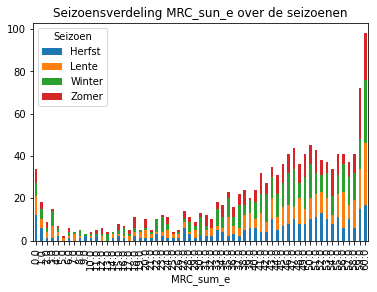

In [186]:
frequentietabellen=[]

for dateframe in dataframes_klimaat:
    freq_table = pd.crosstab(dateframe['MRC_sum_e'], dateframe['Seizoen']) 
    frequentietabellen.append(freq_table)
    print(freq_table, '\n')

combined_freq_table = pd.concat(frequentietabellen)

combined_freq_table = combined_freq_table.groupby(combined_freq_table.index).sum()

combined_freq_table.plot(kind='bar', stacked=True).set_title('Seizoensverdeling MRC_sun_e over de seizoenen')


#### ANOVA uitvoeren

In [187]:
df_mrc_e = df[['MRC_sum_e', 'Seizoen']]
model_1 = ols('MRC_sum_e ~ C(Seizoen)', data=df_mrc_e).fit()
anova_table = sm.stats.anova_lm(model_1, typ=2)
print(anova_table)

                   sum_sq      df         F    PR(>F)
C(Seizoen)     110.231717     3.0  0.134426  0.939545
Residual    354793.657684  1298.0       NaN       NaN


#### Residuen testen op normaliteit met shapiro-wilk toets en QQ-plot tekenen

ShapiroResult(statistic=0.8740780353546143, pvalue=3.66684624681098e-31)


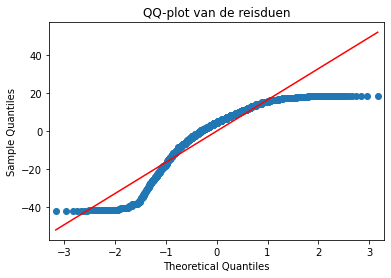

In [188]:
residuen = model_1.resid

print(stats.shapiro(residuen))

sm.qqplot(residuen, line = 's' )
# line = s =>standardized line, the expected order statistics are scaled by the standard deviation 
# of the given sample and have the mean added to them
# https://www.statsmodels.org/dev/generated/statsmodels.graphics.gofplots.qqplot.html
plt.title('QQ-plot van de reisduen')
plt.show()


Niet normaal verdeeld, kan geen anova uitvoeren, dus pair wise t-toets

#### MRC_sum_e

In [189]:
df_lente = df[df['Seizoen']=='Lente']
df_lente_mrc_e = df_lente['MRC_sum_e'].dropna()

In [190]:
df_zomer = df[df['Seizoen']=='Zomer']
df_zomer_mrc_e = df_zomer['MRC_sum_e'].dropna()

In [191]:
df_herfst = df[df['Seizoen']=='Herfst']
df_herfst_mrc_e = df_herfst['MRC_sum_e'].dropna()

In [192]:
df_winter = df[df['Seizoen']=='Winter']
df_winter_mrc_e = df_winter['MRC_sum_e'].dropna()

In [193]:
stats.ttest_ind(df_lente_mrc_e, df_zomer_mrc_e)

Ttest_indResult(statistic=-0.3975787567276532, pvalue=0.691075822060262)

In [194]:
stats.ttest_ind(df_lente_mrc_e, df_herfst_mrc_e)

Ttest_indResult(statistic=0.17146194665194978, pvalue=0.8639180720441522)

In [195]:
stats.ttest_ind(df_lente_mrc_e, df_winter_mrc_e)

Ttest_indResult(statistic=0.1340512936691759, pvalue=0.8933993191443476)

In [196]:
stats.ttest_ind(df_zomer_mrc_e, df_herfst_mrc_e)

Ttest_indResult(statistic=0.5569441319781446, pvalue=0.5777823099944884)

In [197]:
stats.ttest_ind(df_zomer_mrc_e, df_winter_mrc_e)

Ttest_indResult(statistic=0.5673307415975231, pvalue=0.5706726938155942)

In [198]:
stats.ttest_ind(df_herfst_mrc_e, df_winter_mrc_e)

Ttest_indResult(statistic=-0.05805695778196898, pvalue=0.9537205696650012)

#### Klimaat A

In [199]:
df_lente = df[df['Seizoen']=='Lente']
df_lente_A = df_lente[df_lente['klimaat'] == 'A Klimaat']
df_lente_A_mrc_e = df_lente_A['MRC_sum_e'].dropna()

df_zomer = df[df['Seizoen']=='Zomer']
df_zomer_A = df_zomer[df_zomer['klimaat'] == 'A Klimaat']
df_zomer_A_mrc_e = df_zomer_A['MRC_sum_e'].dropna()

df_herfst = df[df['Seizoen']=='Herfst']
df_herfst_A = df_herfst[df_herfst['klimaat'] == 'A Klimaat']
df_herfst_A_mrc_e = df_herfst_A['MRC_sum_e'].dropna()

df_winter = df[df['Seizoen']=='Winter']
df_winter_A = df_winter[df_winter['klimaat'] == 'A Klimaat']
df_winter_A_mrc_e = df_winter_A['MRC_sum_e'].dropna()

In [200]:
stats.ttest_ind(df_lente_A_mrc_e, df_zomer_A_mrc_e)

Ttest_indResult(statistic=0.17242488216799798, pvalue=0.8634591012214874)

In [201]:
stats.ttest_ind(df_lente_A_mrc_e, df_herfst_A_mrc_e)

Ttest_indResult(statistic=-1.0786385437724213, pvalue=0.2832930684623015)

In [202]:
stats.ttest_ind(df_lente_A_mrc_e, df_winter_A_mrc_e)

Ttest_indResult(statistic=1.1364706255999273, pvalue=0.25822945688029486)

In [203]:
stats.ttest_ind(df_zomer_A_mrc_e, df_herfst_A_mrc_e)

Ttest_indResult(statistic=-1.2204771919139683, pvalue=0.2255443875877022)

In [204]:
stats.ttest_ind(df_zomer_A_mrc_e, df_winter_A_mrc_e)

Ttest_indResult(statistic=0.9013189359356614, pvalue=0.36967445473612237)

In [205]:
stats.ttest_ind(df_herfst_A_mrc_e, df_winter_A_mrc_e)

Ttest_indResult(statistic=2.2572419809606656, pvalue=0.02616769803687231)

#### Klimaat B

In [206]:
df_lente = df[df['Seizoen']=='Lente']
df_lente_B = df_lente[df_lente['klimaat'] == 'B Klimaat']
df_lente_B_mrc_e = df_lente_B['MRC_sum_e'].dropna()

df_zomer = df[df['Seizoen']=='Zomer']
df_lente_B = df_zomer[df_zomer['klimaat'] == 'B Klimaat']
df_zomer_B_mrc_e = df_lente_B['MRC_sum_e'].dropna()

df_herfst = df[df['Seizoen']=='Herfst']
df_herfst_B = df_herfst[df_herfst['klimaat'] == 'B Klimaat']
df_herfst_B_mrc_e = df_herfst_B['MRC_sum_e'].dropna()

df_winter = df[df['Seizoen']=='Winter']
df_winter_B = df_winter[df_winter['klimaat'] == 'B Klimaat']
df_winter_B_mrc_e = df_winter_B['MRC_sum_e'].dropna()

In [207]:
stats.ttest_ind(df_lente_B_mrc_e, df_zomer_B_mrc_e)

Ttest_indResult(statistic=-0.1832790539862144, pvalue=0.8555535031799215)

In [208]:
stats.ttest_ind(df_lente_B_mrc_e, df_herfst_B_mrc_e)

Ttest_indResult(statistic=1.033028811537846, pvalue=0.30764564707740544)

In [209]:
stats.ttest_ind(df_lente_B_mrc_e, df_winter_B_mrc_e)

Ttest_indResult(statistic=0.47408291956988513, pvalue=0.637635888399338)

In [210]:
stats.ttest_ind(df_zomer_B_mrc_e, df_herfst_B_mrc_e)

Ttest_indResult(statistic=1.4284997650597513, pvalue=0.16201197401776413)

In [211]:
stats.ttest_ind(df_zomer_B_mrc_e, df_winter_B_mrc_e)

Ttest_indResult(statistic=0.6715852286200144, pvalue=0.5056144318763897)

In [212]:
stats.ttest_ind(df_herfst_B_mrc_e, df_winter_B_mrc_e)

Ttest_indResult(statistic=-0.5319801326759199, pvalue=0.5974158026292029)

#### Klimaat C

In [213]:
df_lente = df[df['Seizoen'] == 'Lente']
df_lente_C = df_lente[df_lente['klimaat'] == 'C Klimaat']
df_lente_C_mrc_e = df_lente_C['MRC_sum_e'].dropna()

df_zomer = df[df['Seizoen'] == 'Zomer']
df_zomer_C = df_zomer[df_zomer['klimaat'] == 'C Klimaat']
df_zomer_C_mrc_e = df_zomer_C['MRC_sum_e'].dropna()

df_herfst = df[df['Seizoen'] == 'Herfst']
df_herfst_C = df_herfst[df_herfst['klimaat'] == 'C Klimaat']
df_herfst_C_mrc_e = df_herfst_C['MRC_sum_e'].dropna()

df_winter = df[df['Seizoen'] == 'Winter']
df_winter_C = df_winter[df_winter['klimaat'] == 'C Klimaat']
df_winter_C_mrc_e = df_winter_C['MRC_sum_e'].dropna()

In [214]:
stats.ttest_ind(df_lente_C_mrc_e, df_zomer_C_mrc_e)

Ttest_indResult(statistic=-0.4665918059121626, pvalue=0.6410321604121328)

In [215]:
stats.ttest_ind(df_lente_C_mrc_e, df_herfst_C_mrc_e)

Ttest_indResult(statistic=0.8203206562946813, pvalue=0.4125396097158809)

In [216]:
stats.ttest_ind(df_lente_C_mrc_e, df_winter_C_mrc_e)

Ttest_indResult(statistic=-0.10746013555448691, pvalue=0.9144684788331611)

In [217]:
stats.ttest_ind(df_zomer_C_mrc_e, df_herfst_C_mrc_e)

Ttest_indResult(statistic=1.243011261448791, pvalue=0.2146361802165554)

In [218]:
stats.ttest_ind(df_zomer_C_mrc_e, df_winter_C_mrc_e)

Ttest_indResult(statistic=0.39399671542890735, pvalue=0.6937602756370076)

In [219]:
stats.ttest_ind(df_herfst_C_mrc_e, df_winter_C_mrc_e)

Ttest_indResult(statistic=-0.9799161964623329, pvalue=0.32766842353413617)

#### Klimaat D

In [220]:
df_lente = df[df['Seizoen'] == 'Lente']
df_lente_D = df_lente[df_lente['klimaat'] == 'D Klimaat']
df_lente_D_mrc_e = df_lente_D['MRC_sum_e'].dropna()

df_zomer = df[df['Seizoen'] == 'Zomer']
df_zomer_D = df_zomer[df_zomer['klimaat'] == 'D Klimaat']
df_zomer_D_mrc_e = df_zomer_D['MRC_sum_e'].dropna()

df_herfst = df[df['Seizoen'] == 'Herfst']
df_herfst_D = df_herfst[df_herfst['klimaat'] == 'D Klimaat']
df_herfst_D_mrc_e = df_herfst_D['MRC_sum_e'].dropna()

df_winter = df[df['Seizoen'] == 'Winter']
df_winter_D = df_winter[df_winter['klimaat'] == 'D Klimaat']
df_winter_D_mrc_e = df_winter_D['MRC_sum_e'].dropna()

In [221]:
stats.ttest_ind(df_lente_D_mrc_e, df_zomer_D_mrc_e)

Ttest_indResult(statistic=-0.016804788828928795, pvalue=0.9866454567918623)

In [222]:
stats.ttest_ind(df_lente_D_mrc_e, df_herfst_D_mrc_e)

Ttest_indResult(statistic=-0.5697289124425807, pvalue=0.5707390277738525)

In [223]:
stats.ttest_ind(df_lente_D_mrc_e, df_winter_D_mrc_e)

Ttest_indResult(statistic=-0.6825428934509726, pvalue=0.49697091615411093)

In [224]:
stats.ttest_ind(df_zomer_D_mrc_e, df_herfst_D_mrc_e)

Ttest_indResult(statistic=-0.6168479380090852, pvalue=0.5393651278519493)

In [225]:
stats.ttest_ind(df_zomer_D_mrc_e, df_winter_D_mrc_e)

Ttest_indResult(statistic=-0.7503812459298587, pvalue=0.455312012931955)

In [226]:
stats.ttest_ind(df_herfst_D_mrc_e, df_winter_D_mrc_e)

Ttest_indResult(statistic=-0.014590601947543797, pvalue=0.988394238584568)

#### MRC_sum_w1

In [227]:
df_mrc_w1 = df[['MRC_sum_w1', 'Seizoen']]
model_2 = ols('MRC_sum_w1 ~ C(Seizoen)', data=df_mrc_w1).fit()
anova_table = sm.stats.anova_lm(model_2, typ=2)
print(anova_table)

                   sum_sq      df         F    PR(>F)
C(Seizoen)     329.660225     3.0  0.331267  0.802752
Residual    431895.216497  1302.0       NaN       NaN


ShapiroResult(statistic=0.8490647077560425, pvalue=1.5278929553549202e-33)


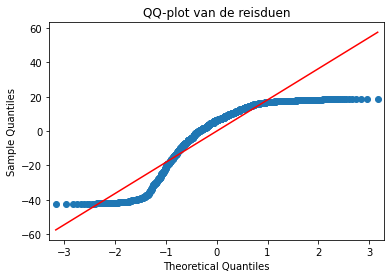

In [228]:
residuen = model_2.resid
print(stats.shapiro(residuen))


sm.qqplot(residuen, line = 's' )
plt.title('QQ-plot van de reisduen')
plt.show()

In [229]:
df_lente = df[df['Seizoen']=='Lente']
df_lente_mrc_w1 = df_lente['MRC_sum_w1'].dropna()

df_zomer = df[df['Seizoen']=='Zomer']
df_zomer_mrc_w1 = df_zomer['MRC_sum_w1'].dropna()

df_herfst = df[df['Seizoen']=='Herfst']
df_herfst_mrc_w1 = df_herfst['MRC_sum_w1'].dropna()

df_winter = df[df['Seizoen']=='Winter']
df_winter_mrc_w1 = df_winter['MRC_sum_w1'].dropna()

In [230]:
stats.ttest_ind(df_lente_mrc_w1, df_zomer_mrc_w1)

Ttest_indResult(statistic=0.3071328590259369, pvalue=0.7588442266504682)

In [231]:
stats.ttest_ind(df_lente_mrc_w1, df_herfst_mrc_w1)

Ttest_indResult(statistic=0.774257794460052, pvalue=0.43908081575201885)

In [232]:
stats.ttest_ind(df_lente_mrc_w1, df_winter_mrc_w1)

Ttest_indResult(statistic=-0.12433509696002487, pvalue=0.9010843760657089)

In [233]:
stats.ttest_ind(df_zomer_mrc_w1, df_herfst_mrc_w1)

Ttest_indResult(statistic=0.4583728920876599, pvalue=0.6468574510140936)

In [234]:
stats.ttest_ind(df_zomer_mrc_w1, df_winter_mrc_w1)

Ttest_indResult(statistic=-0.45087067621335675, pvalue=0.6522229863816218)

In [235]:
stats.ttest_ind(df_herfst_mrc_w1, df_winter_mrc_w1)

Ttest_indResult(statistic=-0.9502849184182766, pvalue=0.3423076184472841)

#### klimaat A

In [236]:
df_lente = df[df['Seizoen']=='Lente']
df_lente_A = df_lente[df_lente['klimaat'] == 'A Klimaat']
df_lente_A_mrc_w1 = df_lente_A['MRC_sum_w1'].dropna()

df_zomer = df[df['Seizoen']=='Zomer']
df_zomer_A = df_zomer[df_zomer['klimaat'] == 'A Klimaat']
df_zomer_A_mrc_w1 = df_zomer_A['MRC_sum_w1'].dropna()

df_herfst = df[df['Seizoen']=='Herfst']
df_herfst_A = df_herfst[df_herfst['klimaat'] == 'A Klimaat']
df_herfst_A_mrc_w1 = df_herfst_A['MRC_sum_w1'].dropna()

df_winter = df[df['Seizoen']=='Winter']
df_winter_A = df_winter[df_winter['klimaat'] == 'A Klimaat']
df_winter_A_mrc_w1 = df_winter_A['MRC_sum_w1'].dropna()

In [237]:
stats.ttest_ind(df_lente_A_mrc_w1, df_zomer_A_mrc_w1)

Ttest_indResult(statistic=0.25707234235866666, pvalue=0.7976618948000251)

In [238]:
stats.ttest_ind(df_lente_A_mrc_w1, df_herfst_A_mrc_w1)

Ttest_indResult(statistic=0.013424731872638235, pvalue=0.9893154179334994)

In [239]:
stats.ttest_ind(df_lente_A_mrc_w1, df_winter_A_mrc_w1)

Ttest_indResult(statistic=0.21010573637874327, pvalue=0.8339703243969361)

In [240]:
stats.ttest_ind(df_zomer_A_mrc_w1, df_herfst_A_mrc_w1)

Ttest_indResult(statistic=-0.24124609410439599, pvalue=0.8099320504762414)

In [241]:
stats.ttest_ind(df_zomer_A_mrc_w1, df_winter_A_mrc_w1)

Ttest_indResult(statistic=-0.0660884642346625, pvalue=0.9474434170727098)

In [242]:
stats.ttest_ind(df_herfst_A_mrc_w1, df_winter_A_mrc_w1)

Ttest_indResult(statistic=0.19219708650487924, pvalue=0.8479775856752814)

#### klimaat B

In [243]:
df_lente = df[df['Seizoen'] == 'Lente']
df_lente_B = df_lente[df_lente['klimaat'] == 'B Klimaat']
df_lente_B_mrc_w1 = df_lente_B['MRC_sum_w1'].dropna()

df_zomer = df[df['Seizoen'] == 'Zomer']
df_zomer_B = df_zomer[df_zomer['klimaat'] == 'B Klimaat']
df_zomer_B_mrc_w1 = df_zomer_B['MRC_sum_w1'].dropna()

df_herfst = df[df['Seizoen'] == 'Herfst']
df_herfst_B = df_herfst[df_herfst['klimaat'] == 'B Klimaat']
df_herfst_B_mrc_w1 = df_herfst_B['MRC_sum_w1'].dropna()

df_winter = df[df['Seizoen'] == 'Winter']
df_winter_B = df_winter[df_winter['klimaat'] == 'B Klimaat']
df_winter_B_mrc_w1 = df_winter_B['MRC_sum_w1'].dropna()

In [244]:
stats.ttest_ind(df_lente_B_mrc_w1, df_zomer_B_mrc_w1)

Ttest_indResult(statistic=0.40544593733352885, pvalue=0.6874235463106204)

In [245]:
stats.ttest_ind(df_lente_B_mrc_w1, df_herfst_B_mrc_w1)

Ttest_indResult(statistic=1.8979091416018778, pvalue=0.06476407210243663)

In [246]:
stats.ttest_ind(df_lente_B_mrc_w1, df_winter_B_mrc_w1)

Ttest_indResult(statistic=0.7122328871825775, pvalue=0.4797683687592853)

In [247]:
stats.ttest_ind(df_zomer_B_mrc_w1, df_herfst_B_mrc_w1)

Ttest_indResult(statistic=1.272760625555293, pvalue=0.21149298969221117)

In [248]:
stats.ttest_ind(df_zomer_B_mrc_w1, df_winter_B_mrc_w1)

Ttest_indResult(statistic=0.24554732620277311, pvalue=0.8072286082018467)

In [249]:
stats.ttest_ind(df_herfst_B_mrc_w1, df_winter_B_mrc_w1)

Ttest_indResult(statistic=-1.04195821739505, pvalue=0.302996790664978)

#### klimaat C

In [250]:
df_lente = df[df['Seizoen'] == 'Lente']
df_lente_C = df_lente[df_lente['klimaat'] == 'C Klimaat']
df_lente_C_mrc_w1 = df_lente_C['MRC_sum_w1'].dropna()

df_zomer = df[df['Seizoen'] == 'Zomer']
df_zomer_C = df_zomer[df_zomer['klimaat'] == 'C Klimaat']
df_zomer_C_mrc_w1 = df_zomer_C['MRC_sum_w1'].dropna()

df_herfst = df[df['Seizoen'] == 'Herfst']
df_herfst_C = df_herfst[df_herfst['klimaat'] == 'C Klimaat']
df_herfst_C_mrc_w1 = df_herfst_C['MRC_sum_w1'].dropna()

df_winter = df[df['Seizoen'] == 'Winter']
df_winter_C = df_winter[df_winter['klimaat'] == 'C Klimaat']
df_winter_C_mrc_w1 = df_winter_C['MRC_sum_w1'].dropna()

In [251]:
stats.ttest_ind(df_lente_C_mrc_w1, df_zomer_C_mrc_w1)

Ttest_indResult(statistic=0.2913313736817593, pvalue=0.770941376502027)

In [252]:
stats.ttest_ind(df_lente_C_mrc_w1, df_herfst_C_mrc_w1)

Ttest_indResult(statistic=0.7357735371568026, pvalue=0.46231307898587837)

In [253]:
stats.ttest_ind(df_lente_C_mrc_w1, df_winter_C_mrc_w1)

Ttest_indResult(statistic=-0.4309497389700735, pvalue=0.6666971730277003)

In [254]:
stats.ttest_ind(df_zomer_C_mrc_w1, df_herfst_C_mrc_w1)

Ttest_indResult(statistic=0.44645621764746135, pvalue=0.6555227105648808)

In [255]:
stats.ttest_ind(df_zomer_C_mrc_w1, df_winter_C_mrc_w1)

Ttest_indResult(statistic=-0.7346311212787782, pvalue=0.4629274506559269)

In [256]:
stats.ttest_ind(df_herfst_C_mrc_w1, df_winter_C_mrc_w1)

Ttest_indResult(statistic=-1.1922072974096698, pvalue=0.23382109850546123)

#### klimaat D

In [257]:
df_lente = df[df['Seizoen'] == 'Lente']
df_lente_D = df_lente[df_lente['klimaat'] == 'D Klimaat']
df_lente_D_mrc_w1 = df_lente_D['MRC_sum_w1'].dropna()

df_zomer = df[df['Seizoen'] == 'Zomer']
df_zomer_D = df_zomer[df_zomer['klimaat'] == 'D Klimaat']
df_zomer_D_mrc_w1 = df_zomer_D['MRC_sum_w1'].dropna()

df_herfst = df[df['Seizoen'] == 'Herfst']
df_herfst_D = df_herfst[df_herfst['klimaat'] == 'D Klimaat']
df_herfst_D_mrc_w1 = df_herfst_D['MRC_sum_w1'].dropna()

df_winter = df[df['Seizoen'] == 'Winter']
df_winter_D = df_winter[df_winter['klimaat'] == 'D Klimaat']
df_winter_D_mrc_w1 = df_winter_D['MRC_sum_w1'].dropna()

In [258]:
stats.ttest_ind(df_lente_D_mrc_w1, df_zomer_D_mrc_w1)

Ttest_indResult(statistic=-0.17130496051823696, pvalue=0.8645244555424378)

In [259]:
stats.ttest_ind(df_lente_D_mrc_w1, df_herfst_D_mrc_w1)

Ttest_indResult(statistic=-0.38869379458649883, pvalue=0.6986995097592751)

In [260]:
stats.ttest_ind(df_lente_D_mrc_w1, df_winter_D_mrc_w1)

Ttest_indResult(statistic=0.21638969716192966, pvalue=0.8292489292216977)

In [261]:
stats.ttest_ind(df_zomer_D_mrc_w1, df_herfst_D_mrc_w1)

Ttest_indResult(statistic=-0.23063332393232183, pvalue=0.8182821372586427)

In [262]:
stats.ttest_ind(df_zomer_D_mrc_w1, df_winter_D_mrc_w1)

Ttest_indResult(statistic=0.43573013596206966, pvalue=0.6642360378153072)

In [263]:
stats.ttest_ind(df_herfst_D_mrc_w1, df_winter_D_mrc_w1)

Ttest_indResult(statistic=0.701657523344908, pvalue=0.4848555988107951)

#### GBSDS_e

In [264]:
for dateframe in dataframes_klimaat:
    freq_table = pd.crosstab(dateframe['GBSDS_e'], dateframe['Seizoen']) 
    print(freq_table, '\n')

Seizoen  Herfst  Lente  Winter  Zomer
GBSDS_e                              
1.0           1      5       0      1
2.0           8      4       4      4
3.0           4      8       7      7
4.0          28     34      36     25
5.0           6      7      10      6 

Seizoen  Herfst  Lente  Winter  Zomer
GBSDS_e                              
1.0           0      1       1      3
2.0           4     10       5      6
3.0           4      4       7      0
4.0          11      7      14      9
5.0           0      1       0      0 

Seizoen  Herfst  Lente  Winter  Zomer
GBSDS_e                              
0.0           4      3       2      3
1.0           7      9       7      9
2.0          36     47      63     56
3.0          35     38      65     31
4.0          77    109     118     95
5.0          14     11      15     13 

Seizoen  Herfst  Lente  Winter  Zomer
GBSDS_e                              
1.0           2      3       3      1
2.0           7      6       4      5
3.0   

In [265]:
freq_table = pd.crosstab(df['GBSDS_e'], df['Seizoen']) 
freq_table

Seizoen,Herfst,Lente,Winter,Zomer
GBSDS_e,,,,
0.0,4,3,2,3
1.0,10,18,11,14
2.0,55,67,76,71
3.0,56,60,91,51
4.0,128,160,193,140
5.0,24,23,27,23


In [266]:
df_GBSDS_e = df
df_C_GBSDS_e = df_C

In [267]:
df_GBSDS_e = df_GBSDS_e.drop(df_GBSDS_e[df_GBSDS_e['GBSDS_e'] == 0].index)
df_C_GBSDS_e = df_C_GBSDS_e.drop(df_C_GBSDS_e[df_C_GBSDS_e['GBSDS_e'] == 0].index)

In [268]:
df_GBSDS_e_seizoen = pd.crosstab(df_GBSDS_e['GBSDS_e'], df_GBSDS_e['Seizoen'])
stats.chi2_contingency(df_GBSDS_e_seizoen)

(10.212860375521586,
 0.5972926045872375,
 12,
 array([[ 11.14714946,  13.39291217,  16.25115562,  12.20878274],
        [ 56.5770416 ,  67.97534669,  82.48228043,  61.96533128],
        [ 54.26348228,  65.19568567,  79.10939908,  59.43143297],
        [130.61093991, 156.92449923, 190.41448382, 143.05007704],
        [ 20.40138675,  24.51155624,  29.74268105,  22.34437596]]))

In [269]:
df_C_GBSDS_e_seizoen = pd.crosstab(df_C_GBSDS_e['GBSDS_e'], df_C_GBSDS_e['Seizoen'])
stats.chi2_contingency(df_C_GBSDS_e_seizoen)

(11.673252938797496,
 0.4722649728649132,
 12,
 array([[  6.3251462 ,   8.00935673,  10.03040936,   7.63508772],
        [ 39.92748538,  50.55906433,  63.31695906,  48.19649123],
        [ 33.40467836,  42.2994152 ,  52.97309942,  40.32280702],
        [ 78.86666667,  99.86666667, 125.06666667,  95.2       ],
        [ 10.47602339,  13.26549708,  16.6128655 ,  12.64561404]]))

#### GBSDS_w1

In [270]:
for dateframe in dataframes_klimaat:
    freq_table = pd.crosstab(dateframe['GBSDS_w1'], dateframe['Seizoen']) 
    print(freq_table, '\n')

Seizoen   Herfst  Lente  Winter  Zomer
GBSDS_w1                              
1.0            1      2       2      1
2.0            9     16       5      7
3.0            8      4      11      7
4.0           21     25      27     18
5.0            8     10      12     10 

Seizoen   Herfst  Lente  Winter  Zomer
GBSDS_w1                              
0.0            1      0       0      0
1.0            1      2       2      3
2.0            3     10       7      6
3.0            3      6       9      3
4.0           12      4       7      3
5.0            0      2       2      2 

Seizoen   Herfst  Lente  Winter  Zomer
GBSDS_w1                              
0.0            3      4       5      4
1.0           13     19      16     20
2.0           35     49      64     46
3.0           37     44      62     36
4.0           63     74      89     70
5.0           23     27      32     30 

Seizoen   Herfst  Lente  Winter  Zomer
GBSDS_w1                              
1.0            3   

In [271]:
freq_table = pd.crosstab(df['GBSDS_w1'], df['Seizoen']) 
freq_table

Seizoen,Herfst,Lente,Winter,Zomer
GBSDS_w1,,,,
0.0,4,4,5,4
1.0,18,28,25,28
2.0,58,81,84,66
3.0,57,65,90,52
4.0,106,109,141,104
5.0,35,44,54,46


In [272]:
df_GBSDS_w1 = df
df_C_GBSDS_w1 = df_C

In [273]:
df_GBSDS_w1 = df_GBSDS_w1.drop(df_GBSDS_w1[df_GBSDS_w1['GBSDS_w1'] == 0].index)
df_C_GBSDS_w1 = df_C_GBSDS_w1.drop(df_C_GBSDS_w1[df_C_GBSDS_w1['GBSDS_w1'] == 0].index)

In [274]:
df_GBSDS_w1_seizoen = pd.crosstab(df_GBSDS_w1['GBSDS_w1'], df_GBSDS_w1['Seizoen'])
stats.chi2_contingency(df_GBSDS_w1_seizoen)

(8.605349528055823,
 0.7362177942060986,
 12,
 array([[ 21.0116189 ,  25.07591015,  30.21378776,  22.69868319],
        [ 61.3369481 ,  73.20139427,  88.19984508,  66.26181255],
        [ 56.03098373,  66.86909373,  80.5701007 ,  60.52982184],
        [ 97.62974438, 116.51432998, 140.38729667, 105.46862897],
        [ 37.99070488,  45.33927188,  54.62896979,  41.04105345]]))

In [275]:
df_C_GBSDS_w1_seizoen = pd.crosstab(df_C_GBSDS_w1['GBSDS_w1'], df_C_GBSDS_w1['Seizoen'])
stats.chi2_contingency(df_C_GBSDS_w1_seizoen)

(5.850671248543038,
 0.9234215659356688,
 12,
 array([[13.69611307, 17.06007067, 21.0647821 , 16.17903416],
        [39.07420495, 48.67137809, 60.09658422, 46.15783274],
        [36.05300353, 44.90812721, 55.44994111, 42.58892815],
        [59.61837456, 74.2614841 , 91.69375736, 70.42638398],
        [22.55830389, 28.09893993, 34.69493522, 26.64782097]]))

#### Surv_unable_to_walk

In [276]:
for dateframe in dataframes_klimaat:
    freq_table = pd.crosstab(dateframe['Surv_unable_to_walk'], dateframe['Seizoen']) 
    print(freq_table, '\n')

Seizoen              Herfst  Lente  Winter  Zomer
Surv_unable_to_walk                              
0                         6      8       4      3
1                        41     50      53     40 

Seizoen              Herfst  Lente  Winter  Zomer
Surv_unable_to_walk                              
0                         4      9       3      9
1                        16     15      24      9 

Seizoen              Herfst  Lente  Winter  Zomer
Surv_unable_to_walk                              
0                        33     45      59     57
1                       142    173     212    151 

Seizoen              Herfst  Lente  Winter  Zomer
Surv_unable_to_walk                              
0                         9      9       7      4
1                        29     24      40     30 



In [277]:
df_Surv_unable_to_walk = pd.crosstab(df['Surv_unable_to_walk'], df['Seizoen'])
stats.chi2_contingency(df_Surv_unable_to_walk)

(4.535997817235742,
 0.209101751712839,
 3,
 array([[ 57.14719272,  67.96433991,  82.04704097,  61.8414264 ],
        [222.85280728, 265.03566009, 319.95295903, 241.1585736 ]]))

In [278]:
df_B_Surv_unable_to_walk = pd.crosstab(df_B['Surv_unable_to_walk'], df_B['Seizoen'])
stats.chi2_contingency(df_B_Surv_unable_to_walk)

(9.831255208333332,
 0.020056357182502475,
 3,
 array([[ 5.61797753,  6.74157303,  7.58426966,  5.05617978],
        [14.38202247, 17.25842697, 19.41573034, 12.94382022]]))

In [279]:
df_C_Surv_unable_to_walk = pd.crosstab(df_C['Surv_unable_to_walk'], df_C['Seizoen'])
stats.chi2_contingency(df_C_Surv_unable_to_walk)

(4.720218826077955,
 0.19346847447480822,
 3,
 array([[ 38.93348624,  48.5       ,  60.2912844 ,  46.27522936],
        [136.06651376, 169.5       , 210.7087156 , 161.72477064]]))

Post hoc voor df_B_Surv_unable_to_walk

In [280]:
df_B_LenZom = df_B[(df_B['Seizoen'] == 'Lente') | (df_B['Seizoen'] == 'Zomer')]
df_B_LenHer = df_B[(df_B['Seizoen'] == 'Lente') | (df_B['Seizoen'] == 'Herfst')]
df_B_LenWin = df_B[(df_B['Seizoen'] == 'Lente') | (df_B['Seizoen'] == 'Winter')]
df_B_ZomHer = df_B[(df_B['Seizoen'] == 'Zomer') | (df_B['Seizoen'] == 'Herfst')]
df_B_ZomWin = df_B[(df_B['Seizoen'] == 'Zomer') | (df_B['Seizoen'] == 'Winter')]
df_B_HerWin = df_B[(df_B['Seizoen'] == 'Herfst') | (df_B['Seizoen'] == 'Winter')]

In [281]:
df_B_Surv_unable_to_walk_seiz = pd.crosstab(df_B_LenZom['Surv_unable_to_walk'], df_B_LenZom['Seizoen'])
stats.chi2_contingency(df_B_Surv_unable_to_walk_seiz)

(0.24508101851851882,
 0.6205601813347754,
 1,
 array([[10.28571429,  7.71428571],
        [13.71428571, 10.28571429]]))

In [282]:
df_B_Surv_unable_to_walk_seiz = pd.crosstab(df_B_LenHer['Surv_unable_to_walk'], df_B_LenHer['Seizoen'])
stats.chi2_contingency(df_B_Surv_unable_to_walk_seiz)

(0.8743589743589744,
 0.3497513801303367,
 1,
 array([[ 5.90909091,  7.09090909],
        [14.09090909, 16.90909091]]))

In [283]:
df_B_Surv_unable_to_walk_seiz = pd.crosstab(df_B_LenWin['Surv_unable_to_walk'], df_B_LenWin['Seizoen'])
stats.chi2_contingency(df_B_Surv_unable_to_walk_seiz)

(3.5602074430199417,
 0.05918034264755438,
 1,
 array([[ 5.64705882,  6.35294118],
        [18.35294118, 20.64705882]]))

In [284]:
df_B_Surv_unable_to_walk_seiz = pd.crosstab(df_B_ZomHer['Surv_unable_to_walk'], df_B_ZomHer['Seizoen'])
stats.chi2_contingency(df_B_Surv_unable_to_walk_seiz)

(2.572632478632479,
 0.10872666332863937,
 1,
 array([[ 6.84210526,  6.15789474],
        [13.15789474, 11.84210526]]))

In [285]:
df_B_Surv_unable_to_walk_seiz = pd.crosstab(df_B_ZomWin['Surv_unable_to_walk'], df_B_ZomWin['Seizoen'])
stats.chi2_contingency(df_B_Surv_unable_to_walk_seiz)

(6.482007575757576,
 0.010897183523382386,
 1,
 array([[ 7.2,  4.8],
        [19.8, 13.2]]))

In [286]:
df_B_Surv_unable_to_walk_seiz = pd.crosstab(df_B_HerWin['Surv_unable_to_walk'], df_B_HerWin['Seizoen'])
stats.chi2_contingency(df_B_Surv_unable_to_walk_seiz)

(0.1865856481481481,
 0.6657736768726352,
 1,
 array([[ 2.9787234,  4.0212766],
        [17.0212766, 22.9787234]]))

De statistische afhankelijkheid is te zien tussen de winter en zomer

Na bonferoni correctie is te concluderen dat het niet meer statistisch significant is

In [287]:
df['CSF_protein_level'].unique()


array([8.4000e-01, 5.1000e-01, 3.2800e+00, 4.2000e-01, 1.4700e+00,
       4.8000e-01, 4.0000e-01, 3.1000e-01, 1.3400e+00, 4.6000e-01,
       1.1800e+00, 8.7000e-01,        nan, 2.4000e-01, 7.5000e-01,
       5.3000e-01, 8.8000e-01, 7.6000e-01, 3.8000e-01, 7.1000e-01,
       5.4000e-01, 9.3000e-01, 6.6000e+00, 3.3000e-01, 8.1000e-01,
       2.9600e+00, 6.6000e-01, 6.9000e-01, 3.0000e-02, 3.4000e-01,
       2.5500e+00, 3.0100e+00, 2.5000e-01, 1.1200e+00, 3.9000e-01,
       9.1000e-01, 1.1700e+00, 6.3400e+00, 4.1000e-01, 3.1100e+00,
       2.7200e+00, 1.9400e+00, 7.0000e-01, 1.9000e-01, 4.4000e-01,
       1.4600e+00, 3.6000e-01, 9.2000e-01, 2.3600e+00, 1.5700e+00,
       5.2000e-01, 1.6500e+00, 7.2500e+00, 1.0100e+00, 6.5000e-01,
       1.8700e+00, 4.7000e-01, 1.0200e+00, 8.5800e-01, 6.1000e-01,
       5.9000e-01, 1.5000e-01, 1.2200e+00, 8.6000e-01, 2.4600e+00,
       2.2000e-01, 8.3000e-01, 1.4400e+00, 4.9400e+00, 9.6000e-01,
       8.0000e-01, 1.2000e-01, 1.6100e+00, 1.0900e+00, 2.1900e

In [288]:
df['Surv_days'].unique()


array([ 1.250e+02,  4.900e+01,  7.520e+02,  1.300e+01,  1.400e+01,
        2.400e+01,  1.700e+01,  3.100e+01,        nan,  2.000e+01,
        1.460e+02,  1.097e+03,  8.300e+01,  1.510e+02,  5.500e+01,
        6.000e+00,  7.380e+02,  3.300e+01,  5.300e+01,  2.300e+01,
        3.840e+02,  3.200e+01,  2.170e+02,  3.950e+02,  1.290e+02,
        3.000e+00,  4.400e+01,  3.500e+01,  8.900e+01,  4.700e+01,
        1.720e+02,  1.500e+01,  2.200e+01,  1.900e+01,  5.800e+01,
        1.100e+01,  8.400e+01,  5.600e+01,  2.700e+01,  3.800e+01,
        8.000e+01,  3.880e+02,  4.100e+01,  1.490e+02,  7.240e+02,
        1.600e+01,  1.450e+02,  1.080e+02,  1.094e+03,  1.093e+03,
        2.710e+02,  1.940e+02,  2.600e+01,  2.740e+02,  1.540e+02,
        5.400e+01,  3.700e+01,  2.800e+01,  5.720e+02,  1.800e+01,
        2.500e+01,  7.900e+01,  3.000e+01,  1.400e+02,  2.820e+02,
        2.230e+02,  2.320e+02,  4.800e+01,  8.000e+00,  1.500e+02,
        3.900e+01,  3.600e+01,  1.430e+02,  5.200e+01,  4.320e

In [289]:
df['Days_between_onset_and_admission'].unique()


array([   5.,    1.,   15.,   10.,    3.,    0.,    2.,    8.,    6.,
          7.,    4.,   13.,   27.,   26.,   16.,    9.,   18.,   11.,
         19.,   23.,   14.,  364.,   47.,   nan,   12., -363.,   17.,
         41.,   50.,   24.,   22.,   53.,  374.,   21.,   52.,  368.,
         32.,   28.,   20.])

Text(0, 0.5, 'Aantal Patienten')

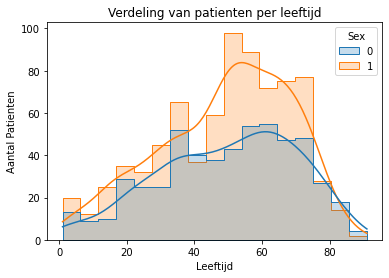

In [290]:
sns.histplot(data = df, x='Age', kde = True, hue="Sex", element="step")
plt.title('Verdeling van patienten per leeftijd')
plt.xlabel('Leeftijd')
plt.ylabel('Aantal Patienten')


Text(0, 0.5, 'Aantal patient')

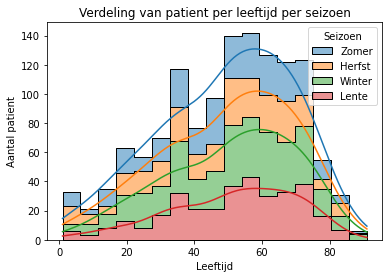

In [291]:
sns.histplot(data = df, x='Age', kde = True, hue="Seizoen", element="step", multiple = 'stack')
plt.title('Verdeling van patient per leeftijd per seizoen')
plt.xlabel('Leeftijd')
plt.ylabel('Aantal patient')

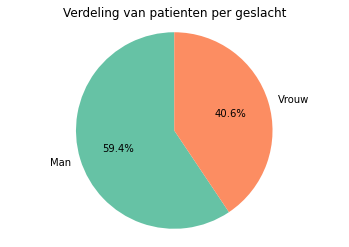

In [292]:
gender_counts = df['Sex'].value_counts()
gender_labels = {0: 'Vrouw', 1: 'Man'}
gender_counts.index = gender_counts.index.map(gender_labels)

plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set2", len(gender_counts)))
plt.axis('equal')
plt.title('Verdeling van patienten per geslacht')
plt.show()

Text(0, 0.5, 'Aantal patient')

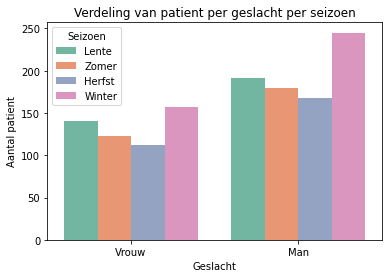

In [293]:
df['Sex'] = df['Sex'].replace({0: 'Vrouw', 1: 'Man'})
sns.countplot(data = df, x='Sex', hue="Seizoen", hue_order = ['Lente', 'Zomer', 'Herfst', 'Winter'],
              palette='Set2')
plt.title('Verdeling van patient per geslacht per seizoen')
plt.xlabel('Geslacht')
plt.ylabel('Aantal patient')

In [294]:
for dateframe in dataframes_klimaat:
    freq_table = pd.crosstab(dateframe['Sex'], dateframe['Seizoen']) 
    print(freq_table, '\n')

Seizoen  Herfst  Lente  Winter  Zomer
Sex                                  
0            21     26      24     18
1            26     32      33     25 

Seizoen  Herfst  Lente  Winter  Zomer
Sex                                  
0             4     10       9      9
1            16     14      18      9 

Seizoen  Herfst  Lente  Winter  Zomer
Sex                                  
0            71     94     105     82
1           104    124     166    126 

Seizoen  Herfst  Lente  Winter  Zomer
Sex                                  
0            16     11      19     14
1            22     22      28     20 



In [295]:
Sex_seizoen = pd.crosstab(df['Sex'], df['Seizoen'])
stats.chi2_contingency(Sex_seizoen)

(0.8461015105677512,
 0.8384113044592554,
 3,
 array([[166.76783005, 198.33459788, 239.43095599, 180.46661608],
        [113.23216995, 134.66540212, 162.56904401, 122.53338392]]))

In [296]:
Sex_seizoen = pd.crosstab(df_A['Sex'], df_A['Seizoen'])
stats.chi2_contingency(Sex_seizoen)

(0.1598676988898045,
 0.9837921146564822,
 3,
 array([[20.40487805, 25.1804878 , 24.74634146, 18.66829268],
        [26.59512195, 32.8195122 , 32.25365854, 24.33170732]]))

In [297]:
Sex_seizoen = pd.crosstab(df_C['Sex'], df_C['Seizoen'])
stats.chi2_contingency(Sex_seizoen)

(1.062066525158066,
 0.78623835045817,
 3,
 array([[ 70.64220183,  88.        , 109.39449541,  83.96330275],
        [104.35779817, 130.        , 161.60550459, 124.03669725]]))

In [298]:
Sex_seizoen = pd.crosstab(df_C['Sex'], df_C['Seizoen'])
stats.chi2_contingency(Sex_seizoen)

(1.062066525158066,
 0.78623835045817,
 3,
 array([[ 70.64220183,  88.        , 109.39449541,  83.96330275],
        [104.35779817, 130.        , 161.60550459, 124.03669725]]))

Pijn

In [299]:
for dateframe in dataframes_klimaat:
    freq_table = pd.crosstab(dateframe['Pain_e'], dateframe['Seizoen']) 
    print(freq_table, '\n')

Seizoen  Herfst  Lente  Winter  Zomer
Pain_e                               
0.0          17     22      27     19
1.0          30     36      30     24 

Seizoen  Herfst  Lente  Winter  Zomer
Pain_e                               
0.0           8     14      13      7
1.0          12     10      14     11 

Seizoen  Herfst  Lente  Winter  Zomer
Pain_e                               
0.0          85     99     136     96
1.0          89    118     135    112 

Seizoen  Herfst  Lente  Winter  Zomer
Pain_e                               
0.0          18     15      22     15
1.0          20     18      24     19 



In [300]:
for dateframe in dataframes_klimaat:
    freq_table = pd.crosstab(dateframe['Pain_w1'], dateframe['Seizoen']) 
    print(freq_table, '\n')

Seizoen  Herfst  Lente  Winter  Zomer
Pain_w1                              
0.0          21     25      32     20
1.0          26     33      25     21 

Seizoen  Herfst  Lente  Winter  Zomer
Pain_w1                              
0.0           9     11      13     13
1.0          11     13      14      5 

Seizoen  Herfst  Lente  Winter  Zomer
Pain_w1                              
0.0          82    122     149    117
1.0          92     96     122     91 

Seizoen  Herfst  Lente  Winter  Zomer
Pain_w1                              
0.0          18     18      23     24
1.0          20     15      24     10 



Genoeg waarden voor een chi kwadraat toets

Entry

In [301]:
Pain_seizoen = pd.crosstab(df['Pain_e'], df['Seizoen'])
stats.chi2_contingency(Pain_seizoen)

(1.8030011939989403,
 0.6142820601807788,
 3,
 array([[130.05855513, 154.76501901, 186.93003802, 141.24638783],
        [148.94144487, 177.23498099, 214.06996198, 161.75361217]]))

In [302]:
Pain_seizoen = pd.crosstab(df_A['Pain_e'], df_A['Seizoen'])
stats.chi2_contingency(Pain_seizoen)

(1.790940031980845,
 0.6169084683212931,
 3,
 array([[19.48780488, 24.04878049, 23.63414634, 17.82926829],
        [27.51219512, 33.95121951, 33.36585366, 25.17073171]]))

In [303]:
Pain_seizoen = pd.crosstab(df_B['Pain_e'], df_B['Seizoen'])
stats.chi2_contingency(Pain_seizoen)

(2.1183796765357057,
 0.5482033882896704,
 3,
 array([[ 9.43820225, 11.3258427 , 12.74157303,  8.49438202],
        [10.56179775, 12.6741573 , 14.25842697,  9.50561798]]))

In [304]:
Pain_seizoen = pd.crosstab(df_C['Pain_e'], df_C['Seizoen'])
stats.chi2_contingency(Pain_seizoen)

(1.3327802996825722,
 0.7213641772174626,
 3,
 array([[ 83.2       , 103.76091954, 129.5816092 ,  99.45747126],
        [ 90.8       , 113.23908046, 141.4183908 , 108.54252874]]))

In [305]:
Pain_seizoen = pd.crosstab(df_D['Pain_e'], df_D['Seizoen'])
stats.chi2_contingency(Pain_seizoen)

(0.13492671136364742,
 0.9873394015452223,
 3,
 array([[17.61589404, 15.29801325, 21.32450331, 15.7615894 ],
        [20.38410596, 17.70198675, 24.67549669, 18.2384106 ]]))

Week 1

In [306]:
Pain_seizoen = pd.crosstab(df['Pain_w1'], df['Seizoen'])
stats.chi2_contingency(Pain_seizoen)

(7.545349559994106,
 0.05640460589079493,
 3,
 array([[147.88060837, 176.5026616 , 213.07528517, 159.54144487],
        [131.11939163, 156.4973384 , 188.92471483, 141.45855513]]))

In [307]:
Pain_seizoen = pd.crosstab(df_A['Pain_w1'], df_A['Seizoen'])
stats.chi2_contingency(Pain_seizoen)

(2.280735158255438,
 0.5162215824141989,
 3,
 array([[22.68965517, 28.        , 27.51724138, 19.79310345],
        [24.31034483, 30.        , 29.48275862, 21.20689655]]))

In [308]:
Pain_seizoen = pd.crosstab(df_B['Pain_w1'], df_B['Seizoen'])
stats.chi2_contingency(Pain_seizoen)

(3.8625243418342503,
 0.27669678503433986,
 3,
 array([[10.33707865, 12.40449438, 13.95505618,  9.30337079],
        [ 9.66292135, 11.59550562, 13.04494382,  8.69662921]]))

In [309]:
Pain_seizoen = pd.crosstab(df_C['Pain_w1'], df_C['Seizoen'])
stats.chi2_contingency(Pain_seizoen)

(4.175741775564967,
 0.2431018431932827,
 3,
 array([[ 93.89207807, 117.63490241, 146.23421355, 112.23880597],
        [ 80.10792193, 100.36509759, 124.76578645,  95.76119403]]))

In [310]:
Pain_seizoen = pd.crosstab(df_D['Pain_w1'], df_D['Seizoen'])
stats.chi2_contingency(Pain_seizoen)

(4.91620525943157,
 0.17803684753611188,
 3,
 array([[20.75      , 18.01973684, 25.66447368, 18.56578947],
        [17.25      , 14.98026316, 21.33552632, 15.43421053]]))

Het seizoen en de pijn die mensen voelen zijn statistisch onafhankelijk

Sens deficits

In [311]:
for dateframe in dataframes_klimaat:
    freq_table = pd.crosstab(dateframe['Sens_deficits_e'], dateframe['Seizoen']) 
    print(freq_table, '\n')

Seizoen          Herfst  Lente  Winter  Zomer
Sens_deficits_e                              
0.0                  20     18      25     14
1.0                  26     34      31     27
2.0                   1      4       1      2 

Seizoen          Herfst  Lente  Winter  Zomer
Sens_deficits_e                              
0.0                   8      9      12      6
1.0                  12     14      15     11
2.0                   0      1       0      0 

Seizoen          Herfst  Lente  Winter  Zomer
Sens_deficits_e                              
0.0                  73     90     105     86
1.0                  96    123     162    112
2.0                   6      3       3      8 

Seizoen          Herfst  Lente  Winter  Zomer
Sens_deficits_e                              
0.0                  15     14      17      9
1.0                  22     18      29     23
2.0                   1      1       1      2 



In [312]:
for dateframe in dataframes_klimaat:
    freq_table = pd.crosstab(dateframe['Sens_deficits_w1'], dateframe['Seizoen']) 
    print(freq_table, '\n')

Seizoen           Herfst  Lente  Winter  Zomer
Sens_deficits_w1                              
0.0                   20     20      27     16
1.0                   22     32      27     21
2.0                    4      5       3      5 

Seizoen           Herfst  Lente  Winter  Zomer
Sens_deficits_w1                              
0.0                   10     10      12      6
1.0                   10     13      15     10
2.0                    0      1       0      1 

Seizoen           Herfst  Lente  Winter  Zomer
Sens_deficits_w1                              
0.0                   80     94     113     87
1.0                   87    112     144    110
2.0                    7      9      12     11 

Seizoen           Herfst  Lente  Winter  Zomer
Sens_deficits_w1                              
0.0                   15     17      21     12
1.0                   22     15      24     19
2.0                    1      1       1      3 



Vaak is de waarde 2 te weinig gegeven voor een chi kwadraat toets, sinds in het codeboek ook niet staat wat de waarde 2 inhoudt is besloten deze weg te houden

In [313]:
df_Sens_deficits_e = df
df_A_Sens_deficits_e = df_A
df_B_Sens_deficits_e = df_B
df_C_Sens_deficits_e = df_C
df_D_Sens_deficits_e = df_D

df_Sens_deficits_w1 = df
df_A_Sens_deficits_w1 = df_A
df_B_Sens_deficits_w1 = df_B
df_C_Sens_deficits_w1 = df_C
df_D_Sens_deficits_w1 = df_D

In [314]:
df_Sens_deficits_e = df_Sens_deficits_e.drop(df_Sens_deficits_e[df_Sens_deficits_e['Sens_deficits_e'] == 2].index)
df_A_Sens_deficits_e = df_A_Sens_deficits_e.drop(df_A_Sens_deficits_e[df_A_Sens_deficits_e['Sens_deficits_e'] == 2].index)
df_B_Sens_deficits_e = df_B_Sens_deficits_e.drop(df_B_Sens_deficits_e[df_B_Sens_deficits_e['Sens_deficits_e'] == 2].index)
df_C_Sens_deficits_e = df_C_Sens_deficits_e.drop(df_C_Sens_deficits_e[df_C_Sens_deficits_e['Sens_deficits_e'] == 2].index)
df_D_Sens_deficits_e = df_D_Sens_deficits_e.drop(df_D_Sens_deficits_e[df_D_Sens_deficits_e['Sens_deficits_e'] == 2].index)

df_Sens_deficits_w1 = df_Sens_deficits_w1.drop(df_Sens_deficits_w1[df_Sens_deficits_w1['Sens_deficits_w1'] == 2].index)
df_A_Sens_deficits_w1 = df_A_Sens_deficits_w1.drop(df_A_Sens_deficits_w1[df_A_Sens_deficits_w1['Sens_deficits_w1'] == 2].index)
df_B_Sens_deficits_w1 = df_B_Sens_deficits_w1.drop(df_B_Sens_deficits_w1[df_B_Sens_deficits_w1['Sens_deficits_w1'] == 2].index)
df_C_Sens_deficits_w1 = df_C_Sens_deficits_w1.drop(df_C_Sens_deficits_w1[df_C_Sens_deficits_w1['Sens_deficits_w1'] == 2].index)
df_D_Sens_deficits_w1 = df_D_Sens_deficits_w1.drop(df_D_Sens_deficits_w1[df_D_Sens_deficits_w1['Sens_deficits_w1'] == 2].index)

De toetsen

Entry

In [315]:
SensDef_seizoen = pd.crosstab(df_Sens_deficits_e['Sens_deficits_e'], df_Sens_deficits_e['Seizoen'])
stats.chi2_contingency(SensDef_seizoen)

(0.545152791101652,
 0.9088652739150143,
 3,
 array([[111.05956113, 130.65830721, 161.68965517, 117.59247649],
        [160.94043887, 189.34169279, 234.31034483, 170.40752351]]))

In [317]:
SensDef_seizoen = pd.crosstab(df_A_Sens_deficits_e['Sens_deficits_e'], df_A_Sens_deficits_e['Seizoen'])
stats.chi2_contingency(SensDef_seizoen)

(1.935547370439908,
 0.5858912555158813,
 3,
 array([[18.16410256, 20.53333333, 22.11282051, 16.18974359],
        [27.83589744, 31.46666667, 33.88717949, 24.81025641]]))

In [ ]:
SensDef_seizoen = pd.crosstab(df_B_Sens_deficits_e['Sens_deficits_e'], df_B_Sens_deficits_e['Seizoen'])
stats.chi2_contingency(SensDef_seizoen)

(0.38368904752536437,
 0.9435909581325236,
 3,
 array([[ 8.04597701,  9.25287356, 10.86206897,  6.83908046],
        [11.95402299, 13.74712644, 16.13793103, 10.16091954]]))

In [318]:
SensDef_seizoen = pd.crosstab(df_C_Sens_deficits_e['Sens_deficits_e'], df_C_Sens_deficits_e['Seizoen'])
stats.chi2_contingency(SensDef_seizoen)

(1.0425128989507468,
 0.7909665969532564,
 3,
 array([[ 70.63282172,  89.02243211, 111.59149941,  82.75324675],
        [ 98.36717828, 123.97756789, 155.40850059, 115.24675325]]))

In [319]:
SensDef_seizoen = pd.crosstab(df_D_Sens_deficits_e['Sens_deficits_e'], df_D_Sens_deficits_e['Seizoen'])
stats.chi2_contingency(SensDef_seizoen)

(1.8863396512705348,
 0.5963290226645186,
 3,
 array([[13.84353741, 11.97278912, 17.21088435, 11.97278912],
        [23.15646259, 20.02721088, 28.78911565, 20.02721088]]))

Week 1

In [320]:
SensDef_seizoen = pd.crosstab(df_Sens_deficits_w1['Sens_deficits_w1'], df_Sens_deficits_w1['Seizoen'])
stats.chi2_contingency(SensDef_seizoen)

(0.8569490402249752,
 0.8358025580311411,
 3,
 array([[119.83909895, 141.01367659, 172.55028158, 126.59694288],
        [146.16090105, 171.98632341, 210.44971842, 154.40305712]]))

In [321]:
SensDef_seizoen = pd.crosstab(df_A_Sens_deficits_w1['Sens_deficits_w1'], df_A_Sens_deficits_w1['Seizoen'])
stats.chi2_contingency(SensDef_seizoen)

(1.6057301820944634,
 0.6580912384031685,
 3,
 array([[18.84324324, 23.32972973, 24.22702703, 16.6       ],
        [23.15675676, 28.67027027, 29.77297297, 20.4       ]]))

In [322]:
SensDef_seizoen = pd.crosstab(df_B_Sens_deficits_w1['Sens_deficits_w1'], df_B_Sens_deficits_w1['Seizoen'])
stats.chi2_contingency(SensDef_seizoen)

(0.5695477370963643,
 0.9033669373112526,
 3,
 array([[ 8.8372093 , 10.1627907 , 11.93023256,  7.06976744],
        [11.1627907 , 12.8372093 , 15.06976744,  8.93023256]]))

In [323]:
SensDef_seizoen = pd.crosstab(df_C_Sens_deficits_w1['Sens_deficits_w1'], df_C_Sens_deficits_w1['Seizoen'])
stats.chi2_contingency(SensDef_seizoen)

(0.7511077177216596,
 0.8611220236959,
 3,
 array([[ 75.5235792 ,  93.16082225, 116.22490931,  89.09068924],
        [ 91.4764208 , 112.83917775, 140.77509069, 107.90931076]]))

In [324]:
SensDef_seizoen = pd.crosstab(df_D_Sens_deficits_w1['Sens_deficits_w1'], df_D_Sens_deficits_w1['Seizoen'])
stats.chi2_contingency(SensDef_seizoen)

(1.6963994439926895,
 0.6377345782094259,
 3,
 array([[16.5862069 , 14.34482759, 20.17241379, 13.89655172],
        [20.4137931 , 17.65517241, 24.82758621, 17.10344828]]))

Comorbidity_respiration

In [325]:
for dateframe in dataframes_klimaat:
    freq_table = pd.crosstab(dateframe['Comorbidity_respiration'], dateframe['Seizoen']) 
    print(freq_table, '\n')

Seizoen                  Herfst  Lente  Winter  Zomer
Comorbidity_respiration                              
0.0                          40     55      52     37
1.0                           7      3       4      6 

Seizoen                  Herfst  Lente  Winter  Zomer
Comorbidity_respiration                              
0.0                          19     22      23     16
1.0                           1      2       4      2 

Seizoen                  Herfst  Lente  Winter  Zomer
Comorbidity_respiration                              
0.0                         154    205     251    195
1.0                          21     13      18     13 

Seizoen                  Herfst  Lente  Winter  Zomer
Comorbidity_respiration                              
0.0                          37     32      42     31
1.0                           1      1       5      3 



Alleen voor klimaat C genoeg dus chi kwadraat voor C en hele dataset

In [326]:
ComRes_seizoen = pd.crosstab(df['Comorbidity_respiration'], df['Seizoen'])
stats.chi2_contingency(ComRes_seizoen)

(5.255695937662587,
 0.15400318667644444,
 3,
 array([[257.85551331, 306.66387833, 367.44410646, 279.0365019 ],
        [ 22.14448669,  26.33612167,  31.55589354,  23.9634981 ]]))

In [327]:
ComRes_seizoen = pd.crosstab(df_C['Comorbidity_respiration'], df_C['Seizoen'])
stats.chi2_contingency(ComRes_seizoen)

(6.594302083012695,
 0.08601673833707718,
 3,
 array([[161.92528736, 201.71264368, 248.90229885, 192.45977011],
        [ 13.07471264,  16.28735632,  20.09770115,  15.54022989]]))

#### Subset gemaakt met Surv_status vs Surv_days

In [328]:
df['Surv_status'] = df['Surv_status'].replace({0: 'lost_to_follow_up', 1: 'in_staat_om_zelfstandig_te_lopen', 2: 'Overleden'})
mean_surv_days = df['Surv_days'].groupby([df['Seizoen'], df['Surv_status']]).mean().reset_index()

In [329]:
mean_surv_days

,Seizoen,Surv_status,Surv_days
0,Herfst,Overleden,68.000000
1,Herfst,in_staat_om_zelfstandig_te_lopen,75.183784
2,Herfst,lost_to_follow_up,367.093750
3,Lente,Overleden,108.363636
4,Lente,in_staat_om_zelfstandig_te_lopen,92.548077
5,Lente,lost_to_follow_up,235.372093
6,Winter,Overleden,92.538462
7,Winter,in_staat_om_zelfstandig_te_lopen,81.393939
8,Winter,lost_to_follow_up,223.980769
9,Zomer,Overleden,169.307692


Text(0, 0.5, 'Aantal patient')

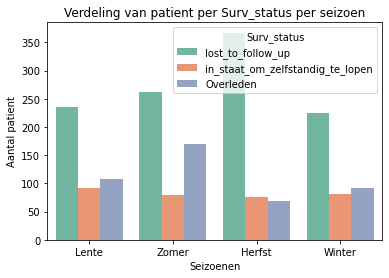

In [330]:
sns.barplot(data = mean_surv_days, y='Surv_days', x="Seizoen", hue = 'Surv_status',
            hue_order = ['lost_to_follow_up','in_staat_om_zelfstandig_te_lopen','Overleden'],
            order = ['Lente','Zomer','Herfst','Winter'],
            palette='Set2')
plt.title('Verdeling van patient per Surv_status per seizoen')
plt.xlabel('Seizoenen')
plt.ylabel('Aantal patient')

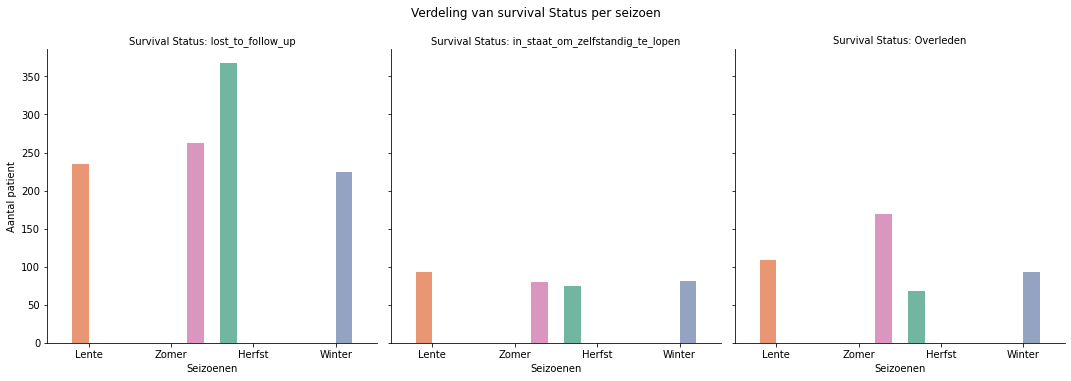

In [331]:
plot = sns.catplot(data=mean_surv_days, kind='bar', x='Seizoen', y='Surv_days', 
            col='Surv_status', hue='Seizoen', 
            order=['Lente', 'Zomer', 'Herfst', 'Winter'],
            col_order = ['lost_to_follow_up','in_staat_om_zelfstandig_te_lopen','Overleden'],
            palette='Set2')

plot.set_titles('Survival Status: {col_name}')
plt.suptitle('Verdeling van survival Status per seizoen', y=1.05) 
plot.set_axis_labels('Seizoenen', 'Aantal patient')

plt.show()

In [332]:
lost_to_follow_up = df[df['Surv_status'] == 'lost_to_follow_up']
in_staat_om_zelfstandig_te_lopen = df[df['Surv_status'] == 'in_staat_om_zelfstandig_te_lopen']
overleden = df[df['Surv_status'] == 'Overleden']

In [333]:
lost_to_follow_up = lost_to_follow_up[['Surv_days', 'Seizoen','klimaat']]
model_3 = ols('Surv_days ~ C(Seizoen)', data=lost_to_follow_up).fit()
anova_table = sm.stats.anova_lm(model_3, typ=2)
print(anova_table)

                  sum_sq     df         F   PR(>F)
C(Seizoen)  4.587000e+05    3.0  1.326951  0.26761
Residual    1.809057e+07  157.0       NaN      NaN


ShapiroResult(statistic=0.7674040794372559, pvalue=1.0602794209562012e-14)


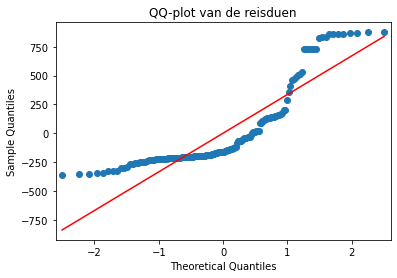

In [334]:
residuen = model_3.resid
print(stats.shapiro(residuen))

sm.qqplot(residuen, line = 's' )
plt.title('QQ-plot van de reisduen')
plt.show()

##### Niet voldoen aan normaliteit, dus pairwise t-toets

In [335]:
lente_status_0 = lost_to_follow_up[lost_to_follow_up['Seizoen'] == 'Lente']
lente_status_0 = lente_status_0['Surv_days'].dropna()

zomer_status_0 = lost_to_follow_up[lost_to_follow_up['Seizoen'] == 'Zomer']
zomer_status_0 = zomer_status_0['Surv_days'].dropna()

herfst_status_0  = lost_to_follow_up[lost_to_follow_up['Seizoen'] == 'Herfst']
herfst_status_0  = herfst_status_0 ['Surv_days'].dropna()

winter_status_0  = lost_to_follow_up[lost_to_follow_up['Seizoen'] == 'Winter']
winter_status_0  = winter_status_0 ['Surv_days'].dropna()

In [336]:
print('t-toets op groepen lente_status_0  en zomer_status_0 :' , stats.ttest_ind(lente_status_0 ,zomer_status_0 ))
print('t-toets op groepen lente_status_0  en herfst_status_0 :' ,stats.ttest_ind(lente_status_0 ,herfst_status_0 ))
print('t-toets op groepen lente_status_0  en winter_status_0 :' ,stats.ttest_ind(lente_status_0 ,winter_status_0 ))
print('t-toets op groepen zomer_status_0  en herfst_status_0 :' ,stats.ttest_ind(zomer_status_0 ,herfst_status_0 ))
print('t-toets op groepen zomer_status_0  en winter_status_0 :' ,stats.ttest_ind(zomer_status_0 ,winter_status_0 ))
print('t-toets op groepen herfst_status_0  en winter_status_0 :' ,stats.ttest_ind(herfst_status_0 ,winter_status_0 ))

t-toets op groepen lente_status_0  en zomer_status_0 : Ttest_indResult(statistic=-0.3554877160646544, pvalue=0.7232221105333847)
t-toets op groepen lente_status_0  en herfst_status_0 : Ttest_indResult(statistic=-1.546866604338499, pvalue=0.12621995304865438)
t-toets op groepen lente_status_0  en winter_status_0 : Ttest_indResult(statistic=0.1722613894480457, pvalue=0.8636063521371962)
t-toets op groepen zomer_status_0  en herfst_status_0 : Ttest_indResult(statistic=-1.166952195095853, pvalue=0.24755937792514315)
t-toets op groepen zomer_status_0  en winter_status_0 : Ttest_indResult(statistic=0.5491838661129114, pvalue=0.584336272654684)
t-toets op groepen herfst_status_0  en winter_status_0 : Ttest_indResult(statistic=1.8277596277170225, pvalue=0.07122289216338502)


In [337]:
lost_to_follow_up['Seizoen'].groupby(lost_to_follow_up['klimaat']).value_counts()

klimaat    Seizoen
A Klimaat  Lente      15
           Winter     13
           Herfst     11
           Zomer      11
B Klimaat  Lente      11
           Zomer      10
           Herfst      7
           Winter      7
C Klimaat  Winter     90
           Zomer      81
           Lente      73
           Herfst     52
D Klimaat  Lente      15
           Winter     15
           Herfst     14
           Zomer       5
Name: Seizoen, dtype: int64

klimaat A

In [338]:
lente_status_0 = lost_to_follow_up[lost_to_follow_up['Seizoen'] == 'Lente']
lente_status_0_A = lente_status_0[lente_status_0['klimaat'] == 'A Klimaat']
lente_status_0_A = lente_status_0_A['Surv_days'].dropna()

zomer_status_0 = lost_to_follow_up[lost_to_follow_up['Seizoen'] == 'Zomer']
zomer_status_0_A = zomer_status_0[zomer_status_0['klimaat'] == 'A Klimaat']
zomer_status_0_A = zomer_status_0_A['Surv_days'].dropna()

herfst_status_0  = lost_to_follow_up[lost_to_follow_up['Seizoen'] == 'Herfst']
herfst_status_0_A = herfst_status_0[herfst_status_0['klimaat'] == 'A Klimaat']
herfst_status_0_A  = herfst_status_0_A ['Surv_days'].dropna()

winter_status_0  = lost_to_follow_up[lost_to_follow_up['Seizoen'] == 'Winter']
winter_status_0_A = winter_status_0[winter_status_0['klimaat'] == 'A Klimaat']
winter_status_0_A  = winter_status_0_A ['Surv_days'].dropna()

In [339]:
print('t-toets op groepen lente_status_0_A  en zomer_status_0_A :' , stats.ttest_ind(lente_status_0_A ,zomer_status_0_A ))
print('t-toets op groepen lente_status_0_A  en herfst_status_0_A :' ,stats.ttest_ind(lente_status_0_A ,herfst_status_0_A ))
print('t-toets op groepen lente_status_0_A  en winter_status_0_A :' ,stats.ttest_ind(lente_status_0_A ,winter_status_0_A ))
print('t-toets op groepen zomer_status_0_A  en herfst_status_0_A :' ,stats.ttest_ind(zomer_status_0_A ,herfst_status_0_A ))
print('t-toets op groepen zomer_status_0_A  en winter_status_0_A :' ,stats.ttest_ind(zomer_status_0_A ,winter_status_0_A ))
print('t-toets op groepen herfst_status_0_A  en winter_status_0_A :' ,stats.ttest_ind(herfst_status_0_A ,winter_status_0_A ))

t-toets op groepen lente_status_0_A  en zomer_status_0_A : Ttest_indResult(statistic=-0.6748686979543076, pvalue=0.5115838270592856)
t-toets op groepen lente_status_0_A  en herfst_status_0_A : Ttest_indResult(statistic=0.3359352108648631, pvalue=0.7438618068953448)
t-toets op groepen lente_status_0_A  en winter_status_0_A : Ttest_indResult(statistic=-0.5860141605633883, pvalue=0.5671942383217969)
t-toets op groepen zomer_status_0_A  en herfst_status_0_A : Ttest_indResult(statistic=0.9834344130726307, pvalue=0.34653006692857347)
t-toets op groepen zomer_status_0_A  en winter_status_0_A : Ttest_indResult(statistic=0.08122299086236627, pvalue=0.936338468388922)
t-toets op groepen herfst_status_0_A  en winter_status_0_A : Ttest_indResult(statistic=-0.8778046987242003, pvalue=0.3972845198431102)


klimaat B

In [340]:
lente_status_0 = lost_to_follow_up[lost_to_follow_up['Seizoen'] == 'Lente']
lente_status_0_B = lente_status_0[lente_status_0['klimaat'] == 'B Klimaat']
lente_status_0_B = lente_status_0_B['Surv_days'].dropna()

zomer_status_0 = lost_to_follow_up[lost_to_follow_up['Seizoen'] == 'Zomer']
zomer_status_0_B = zomer_status_0[zomer_status_0['klimaat'] == 'B Klimaat']
zomer_status_0_B = zomer_status_0_B['Surv_days'].dropna()

herfst_status_0 = lost_to_follow_up[lost_to_follow_up['Seizoen'] == 'Herfst']
herfst_status_0_B = herfst_status_0[herfst_status_0['klimaat'] == 'B Klimaat']
herfst_status_0_B = herfst_status_0_B['Surv_days'].dropna()

winter_status_0 = lost_to_follow_up[lost_to_follow_up['Seizoen'] == 'Winter']
winter_status_0_B = winter_status_0[winter_status_0['klimaat'] == 'B Klimaat']
winter_status_0_B = winter_status_0_B['Surv_days'].dropna()


In [341]:
print('t-toets op groepen lente_status_0_B en zomer_status_0_B :' , stats.ttest_ind(lente_status_0_B, zomer_status_0_B))
print('t-toets op groepen lente_status_0_B en herfst_status_0_B :' , stats.ttest_ind(lente_status_0_B, herfst_status_0_B))
print('t-toets op groepen lente_status_0_B en winter_status_0_B :' , stats.ttest_ind(lente_status_0_B, winter_status_0_B))
print('t-toets op groepen zomer_status_0_B en herfst_status_0_B :' , stats.ttest_ind(zomer_status_0_B, herfst_status_0_B))
print('t-toets op groepen zomer_status_0_B en winter_status_0_B :' , stats.ttest_ind(zomer_status_0_B, winter_status_0_B))
print('t-toets op groepen herfst_status_0_B en winter_status_0_B :' , stats.ttest_ind(herfst_status_0_B, winter_status_0_B))


t-toets op groepen lente_status_0_B en zomer_status_0_B : Ttest_indResult(statistic=nan, pvalue=nan)
t-toets op groepen lente_status_0_B en herfst_status_0_B : Ttest_indResult(statistic=-0.9547976439952003, pvalue=0.4101187525754582)
t-toets op groepen lente_status_0_B en winter_status_0_B : Ttest_indResult(statistic=-0.8834272842888145, pvalue=0.4269050179353795)
t-toets op groepen zomer_status_0_B en herfst_status_0_B : Ttest_indResult(statistic=nan, pvalue=nan)
t-toets op groepen zomer_status_0_B en winter_status_0_B : Ttest_indResult(statistic=nan, pvalue=nan)
t-toets op groepen herfst_status_0_B en winter_status_0_B : Ttest_indResult(statistic=-0.21310127719051136, pvalue=0.8396642556791933)


c:\Users\Chong\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3723: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\Chong\anaconda3\lib\site-packages\numpy\core\_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Klimaat C

In [342]:
lente_status_0 = lost_to_follow_up[lost_to_follow_up['Seizoen'] == 'Lente']
lente_status_0_C = lente_status_0[lente_status_0['klimaat'] == 'C Klimaat']
lente_status_0_C = lente_status_0_C['Surv_days'].dropna()

zomer_status_0 = lost_to_follow_up[lost_to_follow_up['Seizoen'] == 'Zomer']
zomer_status_0_C = zomer_status_0[zomer_status_0['klimaat'] == 'C Klimaat']
zomer_status_0_C = zomer_status_0_C['Surv_days'].dropna()

herfst_status_0 = lost_to_follow_up[lost_to_follow_up['Seizoen'] == 'Herfst']
herfst_status_0_C = herfst_status_0[herfst_status_0['klimaat'] == 'C Klimaat']
herfst_status_0_C = herfst_status_0_C['Surv_days'].dropna()

winter_status_0 = lost_to_follow_up[lost_to_follow_up['Seizoen'] == 'Winter']
winter_status_0_C = winter_status_0[winter_status_0['klimaat'] == 'C Klimaat']
winter_status_0_C = winter_status_0_C['Surv_days'].dropna()


In [343]:
print('t-toets op groepen lente_status_0_C en zomer_status_0_C :' , stats.ttest_ind(lente_status_0_C, zomer_status_0_C))
print('t-toets op groepen lente_status_0_C en herfst_status_0_C :' , stats.ttest_ind(lente_status_0_C, herfst_status_0_C))
print('t-toets op groepen lente_status_0_C en winter_status_0_C :' , stats.ttest_ind(lente_status_0_C, winter_status_0_C))
print('t-toets op groepen zomer_status_0_C en herfst_status_0_C :' , stats.ttest_ind(zomer_status_0_C, herfst_status_0_C))
print('t-toets op groepen zomer_status_0_C en winter_status_0_C :' , stats.ttest_ind(zomer_status_0_C, winter_status_0_C))
print('t-toets op groepen herfst_status_0_C en winter_status_0_C :' , stats.ttest_ind(herfst_status_0_C, winter_status_0_C))


t-toets op groepen lente_status_0_C en zomer_status_0_C : Ttest_indResult(statistic=-0.0378171810438573, pvalue=0.9699840349955648)
t-toets op groepen lente_status_0_C en herfst_status_0_C : Ttest_indResult(statistic=-1.487937575901321, pvalue=0.14374194084216754)
t-toets op groepen lente_status_0_C en winter_status_0_C : Ttest_indResult(statistic=1.0667849495580723, pvalue=0.29056662091248286)
t-toets op groepen zomer_status_0_C en herfst_status_0_C : Ttest_indResult(statistic=-1.4356354768552733, pvalue=0.15869195117885884)
t-toets op groepen zomer_status_0_C en winter_status_0_C : Ttest_indResult(statistic=1.1048029983235068, pvalue=0.27423536409307)
t-toets op groepen herfst_status_0_C en winter_status_0_C : Ttest_indResult(statistic=2.571199982949284, pvalue=0.013289008831980078)


Klimaat D

In [344]:
lente_status_0 = lost_to_follow_up[lost_to_follow_up['Seizoen'] == 'Lente']
lente_status_0_D = lente_status_0[lente_status_0['klimaat'] == 'D Klimaat']
lente_status_0_D = lente_status_0_D['Surv_days'].dropna()

zomer_status_0 = lost_to_follow_up[lost_to_follow_up['Seizoen'] == 'Zomer']
zomer_status_0_D = zomer_status_0[zomer_status_0['klimaat'] == 'D Klimaat']
zomer_status_0_D = zomer_status_0_D['Surv_days'].dropna()

herfst_status_0 = lost_to_follow_up[lost_to_follow_up['Seizoen'] == 'Herfst']
herfst_status_0_D = herfst_status_0[herfst_status_0['klimaat'] == 'D Klimaat']
herfst_status_0_D = herfst_status_0_D['Surv_days'].dropna()

winter_status_0 = lost_to_follow_up[lost_to_follow_up['Seizoen'] == 'Winter']
winter_status_0_D = winter_status_0[winter_status_0['klimaat'] == 'D Klimaat']
winter_status_0_D = winter_status_0_D['Surv_days'].dropna()


In [345]:
print('t-toets op groepen lente_status_0_D en zomer_status_0_D :' , stats.ttest_ind(lente_status_0_D, zomer_status_0_D))
print('t-toets op groepen lente_status_0_D en herfst_status_0_D :' , stats.ttest_ind(lente_status_0_D, herfst_status_0_D))
print('t-toets op groepen lente_status_0_D en winter_status_0_D :' , stats.ttest_ind(lente_status_0_D, winter_status_0_D))
print('t-toets op groepen zomer_status_0_D en herfst_status_0_D :' , stats.ttest_ind(zomer_status_0_D, herfst_status_0_D))
print('t-toets op groepen zomer_status_0_D en winter_status_0_D :' , stats.ttest_ind(zomer_status_0_D, winter_status_0_D))
print('t-toets op groepen herfst_status_0_D en winter_status_0_D :' , stats.ttest_ind(herfst_status_0_D, winter_status_0_D))


t-toets op groepen lente_status_0_D en zomer_status_0_D : Ttest_indResult(statistic=nan, pvalue=nan)
t-toets op groepen lente_status_0_D en herfst_status_0_D : Ttest_indResult(statistic=-1.0734864531274158, pvalue=0.3109906518135099)
t-toets op groepen lente_status_0_D en winter_status_0_D : Ttest_indResult(statistic=-1.0637480443689242, pvalue=0.30838064318938596)
t-toets op groepen zomer_status_0_D en herfst_status_0_D : Ttest_indResult(statistic=nan, pvalue=nan)
t-toets op groepen zomer_status_0_D en winter_status_0_D : Ttest_indResult(statistic=nan, pvalue=nan)
t-toets op groepen herfst_status_0_D en winter_status_0_D : Ttest_indResult(statistic=-0.4048008484692521, pvalue=0.6933843543093168)


#### in_staat_om_zelfstandig_te_lopen

In [346]:
in_staat_om_zelfstandig_te_lopen = in_staat_om_zelfstandig_te_lopen[['Surv_days', 'Seizoen','klimaat']]
model_4 = ols('Surv_days ~ C(Seizoen)', data=in_staat_om_zelfstandig_te_lopen).fit()
anova_table = sm.stats.anova_lm(model_4, typ=2)
print(anova_table)

                  sum_sq     df         F    PR(>F)
C(Seizoen)  3.217295e+04    3.0  0.732256  0.532895
Residual    1.224371e+07  836.0       NaN       NaN


ShapiroResult(statistic=0.616007924079895, pvalue=1.502127494026845e-39)


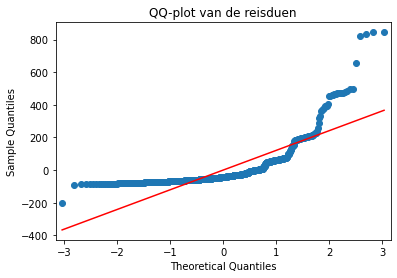

In [347]:
residuen = model_4.resid
print(stats.shapiro(residuen))

sm.qqplot(residuen, line = 's' )
plt.title('QQ-plot van de reisduen')
plt.show()

In [348]:
lente_status_1 = in_staat_om_zelfstandig_te_lopen[in_staat_om_zelfstandig_te_lopen['Seizoen'] == 'Lente']
lente_status_1 = lente_status_1['Surv_days'].dropna()

zomer_status_1 = in_staat_om_zelfstandig_te_lopen[in_staat_om_zelfstandig_te_lopen['Seizoen'] == 'Zomer']
zomer_status_1 = zomer_status_1['Surv_days'].dropna()

herfst_status_1 = in_staat_om_zelfstandig_te_lopen[in_staat_om_zelfstandig_te_lopen['Seizoen'] == 'Herfst']
herfst_status_1 = herfst_status_1['Surv_days'].dropna()

winter_status_1 = in_staat_om_zelfstandig_te_lopen[in_staat_om_zelfstandig_te_lopen['Seizoen'] == 'Winter']
winter_status_1 = winter_status_1['Surv_days'].dropna()

In [349]:
print('t-toets op groepen lente_status_1 en zomer_status_1:' , stats.ttest_ind(lente_status_1,zomer_status_1))
print('t-toets op groepen lente_status_1 en herfst_status_1:' ,stats.ttest_ind(lente_status_1,herfst_status_1))
print('t-toets op groepen lente_status_1 en winter_status_1:' ,stats.ttest_ind(lente_status_1,winter_status_1))
print('t-toets op groepen zomer_status_1 en herfst_status_1:' ,stats.ttest_ind(zomer_status_1,herfst_status_1))
print('t-toets op groepen zomer_status_1 en winter_status_1:' ,stats.ttest_ind(zomer_status_1,winter_status_1))
print('t-toets op groepen herfst_status_1 en winter_status_1:' ,stats.ttest_ind(herfst_status_1,winter_status_1))

t-toets op groepen lente_status_1 en zomer_status_1: Ttest_indResult(statistic=0.9309451361840685, pvalue=0.3524593246228853)
t-toets op groepen lente_status_1 en herfst_status_1: Ttest_indResult(statistic=1.35939875455261, pvalue=0.1748037391153721)
t-toets op groepen lente_status_1 en winter_status_1: Ttest_indResult(statistic=0.9478965351362599, pvalue=0.3436692361400242)
t-toets op groepen zomer_status_1 en herfst_status_1: Ttest_indResult(statistic=0.4278708128642892, pvalue=0.6689968275371428)
t-toets op groepen zomer_status_1 en winter_status_1: Ttest_indResult(statistic=-0.10476778224231127, pvalue=0.9166072797188809)
t-toets op groepen herfst_status_1 en winter_status_1: Ttest_indResult(statistic=-0.5782968021569393, pvalue=0.5633549829099378)


In [350]:
in_staat_om_zelfstandig_te_lopen['Seizoen'].groupby(in_staat_om_zelfstandig_te_lopen['klimaat']).value_counts()

klimaat    Seizoen
A Klimaat  Lente       43
           Winter      42
           Herfst      33
           Zomer       29
B Klimaat  Winter      19
           Lente       13
           Herfst      12
           Zomer        8
C Klimaat  Winter     171
           Lente      135
           Zomer      119
           Herfst     116
D Klimaat  Winter      32
           Zomer       27
           Herfst      24
           Lente       17
Name: Seizoen, dtype: int64

klimaat A

In [351]:
lente_status_1 = in_staat_om_zelfstandig_te_lopen[in_staat_om_zelfstandig_te_lopen['Seizoen'] == 'Lente']
lente_status_1_A = lente_status_1[lente_status_1['klimaat'] == 'A Klimaat']
lente_status_1_A = lente_status_1_A['Surv_days'].dropna()

zomer_status_1 = in_staat_om_zelfstandig_te_lopen[in_staat_om_zelfstandig_te_lopen['Seizoen'] == 'Zomer']
zomer_status_1_A = zomer_status_1[zomer_status_1['klimaat'] == 'A Klimaat']
zomer_status_1_A = zomer_status_1_A['Surv_days'].dropna()

herfst_status_1  = in_staat_om_zelfstandig_te_lopen[in_staat_om_zelfstandig_te_lopen['Seizoen'] == 'Herfst']
herfst_status_1_A = herfst_status_1[herfst_status_1['klimaat'] == 'A Klimaat']
herfst_status_1_A  = herfst_status_1_A ['Surv_days'].dropna()

winter_status_1  = in_staat_om_zelfstandig_te_lopen[in_staat_om_zelfstandig_te_lopen['Seizoen'] == 'Winter']
winter_status_1_A = winter_status_1[winter_status_1['klimaat'] == 'A Klimaat']
winter_status_1_A  = winter_status_1_A ['Surv_days'].dropna()

In [352]:
print('t-toets op groepen lente_status_1_A  en zomer_status_1_A :' , stats.ttest_ind(lente_status_1_A ,zomer_status_1_A ))
print('t-toets op groepen lente_status_1_A  en herfst_status_1_A :' ,stats.ttest_ind(lente_status_1_A ,herfst_status_1_A ))
print('t-toets op groepen lente_status_1_A  en winter_status_1_A :' ,stats.ttest_ind(lente_status_1_A ,winter_status_1_A ))
print('t-toets op groepen zomer_status_1_A  en herfst_status_1_A :' ,stats.ttest_ind(zomer_status_1_A ,herfst_status_1_A ))
print('t-toets op groepen zomer_status_1_A  en winter_status_1_A :' ,stats.ttest_ind(zomer_status_1_A ,winter_status_1_A ))
print('t-toets op groepen herfst_status_1_A  en winter_status_1_A :' ,stats.ttest_ind(herfst_status_1_A ,winter_status_1_A ))

t-toets op groepen lente_status_1_A  en zomer_status_1_A : Ttest_indResult(statistic=0.4149223438517319, pvalue=0.6794677037964896)
t-toets op groepen lente_status_1_A  en herfst_status_1_A : Ttest_indResult(statistic=-0.4457630172155645, pvalue=0.657069922698506)
t-toets op groepen lente_status_1_A  en winter_status_1_A : Ttest_indResult(statistic=1.3015953660825346, pvalue=0.19665589423796484)
t-toets op groepen zomer_status_1_A  en herfst_status_1_A : Ttest_indResult(statistic=-0.6999997490806925, pvalue=0.48663282055646573)
t-toets op groepen zomer_status_1_A  en winter_status_1_A : Ttest_indResult(statistic=0.6161398926527474, pvalue=0.5398295696597105)
t-toets op groepen herfst_status_1_A  en winter_status_1_A : Ttest_indResult(statistic=1.4980262851707389, pvalue=0.13843830164807358)


klimaat B

In [353]:
lente_status_1 = in_staat_om_zelfstandig_te_lopen[in_staat_om_zelfstandig_te_lopen['Seizoen'] == 'Lente']
lente_status_1_B = lente_status_1[lente_status_1['klimaat'] == 'B Klimaat']
lente_status_1_B = lente_status_1_B['Surv_days'].dropna()

zomer_status_1 = in_staat_om_zelfstandig_te_lopen[in_staat_om_zelfstandig_te_lopen['Seizoen'] == 'Zomer']
zomer_status_1_B = zomer_status_1[zomer_status_1['klimaat'] == 'B Klimaat']
zomer_status_1_B = zomer_status_1_B['Surv_days'].dropna()

herfst_status_1 = in_staat_om_zelfstandig_te_lopen[in_staat_om_zelfstandig_te_lopen['Seizoen'] == 'Herfst']
herfst_status_1_B = herfst_status_1[herfst_status_1['klimaat'] == 'B Klimaat']
herfst_status_1_B = herfst_status_1_B['Surv_days'].dropna()

winter_status_1 = in_staat_om_zelfstandig_te_lopen[in_staat_om_zelfstandig_te_lopen['Seizoen'] == 'Winter']
winter_status_1_B = winter_status_1[winter_status_1['klimaat'] == 'B Klimaat']
winter_status_1_B = winter_status_1_B['Surv_days'].dropna()


In [354]:
print('t-toets op groepen lente_status_1_B en zomer_status_1_B :' , stats.ttest_ind(lente_status_1_B, zomer_status_1_B))
print('t-toets op groepen lente_status_1_B en herfst_status_1_B :' , stats.ttest_ind(lente_status_1_B, herfst_status_1_B))
print('t-toets op groepen lente_status_1_B en winter_status_1_B :' , stats.ttest_ind(lente_status_1_B, winter_status_1_B))
print('t-toets op groepen zomer_status_1_B en herfst_status_1_B :' , stats.ttest_ind(zomer_status_1_B, herfst_status_1_B))
print('t-toets op groepen zomer_status_1_B en winter_status_1_B :' , stats.ttest_ind(zomer_status_1_B, winter_status_1_B))
print('t-toets op groepen herfst_status_1_B en winter_status_1_B :' , stats.ttest_ind(herfst_status_1_B, winter_status_1_B))


t-toets op groepen lente_status_1_B en zomer_status_1_B : Ttest_indResult(statistic=-1.5193902536118233, pvalue=0.14513031351289413)
t-toets op groepen lente_status_1_B en herfst_status_1_B : Ttest_indResult(statistic=-1.0577481707841139, pvalue=0.30115375649467746)
t-toets op groepen lente_status_1_B en winter_status_1_B : Ttest_indResult(statistic=0.39118871415516726, pvalue=0.6984223648158143)
t-toets op groepen zomer_status_1_B en herfst_status_1_B : Ttest_indResult(statistic=0.5775134457583811, pvalue=0.5707466979388149)
t-toets op groepen zomer_status_1_B en winter_status_1_B : Ttest_indResult(statistic=1.797480955819704, pvalue=0.08434986468475783)
t-toets op groepen herfst_status_1_B en winter_status_1_B : Ttest_indResult(statistic=1.353735574125871, pvalue=0.1862780031673565)


klimaat C

In [355]:
lente_status_1 = in_staat_om_zelfstandig_te_lopen[in_staat_om_zelfstandig_te_lopen['Seizoen'] == 'Lente']
lente_status_1_C = lente_status_1[lente_status_1['klimaat'] == 'C Klimaat']
lente_status_1_C = lente_status_1_C['Surv_days'].dropna()

zomer_status_1 = in_staat_om_zelfstandig_te_lopen[in_staat_om_zelfstandig_te_lopen['Seizoen'] == 'Zomer']
zomer_status_1_C = zomer_status_1[zomer_status_1['klimaat'] == 'C Klimaat']
zomer_status_1_C = zomer_status_1_C['Surv_days'].dropna()

herfst_status_1 = in_staat_om_zelfstandig_te_lopen[in_staat_om_zelfstandig_te_lopen['Seizoen'] == 'Herfst']
herfst_status_1_C = herfst_status_1[herfst_status_1['klimaat'] == 'C Klimaat']
herfst_status_1_C = herfst_status_1_C['Surv_days'].dropna()

winter_status_1 = in_staat_om_zelfstandig_te_lopen[in_staat_om_zelfstandig_te_lopen['Seizoen'] == 'Winter']
winter_status_1_C = winter_status_1[winter_status_1['klimaat'] == 'C Klimaat']
winter_status_1_C = winter_status_1_C['Surv_days'].dropna()


In [356]:
print('t-toets op groepen lente_status_1_C en zomer_status_1_C :' , stats.ttest_ind(lente_status_1_C, zomer_status_1_C))
print('t-toets op groepen lente_status_1_C en herfst_status_1_C :' , stats.ttest_ind(lente_status_1_C, herfst_status_1_C))
print('t-toets op groepen lente_status_1_C en winter_status_1_C :' , stats.ttest_ind(lente_status_1_C, winter_status_1_C))
print('t-toets op groepen zomer_status_1_C en herfst_status_1_C :' , stats.ttest_ind(zomer_status_1_C, herfst_status_1_C))
print('t-toets op groepen zomer_status_1_C en winter_status_1_C :' , stats.ttest_ind(zomer_status_1_C, winter_status_1_C))
print('t-toets op groepen herfst_status_1_C en winter_status_1_C :' , stats.ttest_ind(herfst_status_1_C, winter_status_1_C))


t-toets op groepen lente_status_1_C en zomer_status_1_C : Ttest_indResult(statistic=1.0212507667461126, pvalue=0.3081150424629656)
t-toets op groepen lente_status_1_C en herfst_status_1_C : Ttest_indResult(statistic=1.560318333633688, pvalue=0.11995471820726719)
t-toets op groepen lente_status_1_C en winter_status_1_C : Ttest_indResult(statistic=-0.0929022628517289, pvalue=0.9260424022576969)
t-toets op groepen zomer_status_1_C en herfst_status_1_C : Ttest_indResult(statistic=0.7559567403374432, pvalue=0.4504387197384616)
t-toets op groepen zomer_status_1_C en winter_status_1_C : Ttest_indResult(statistic=-1.2754276851510564, pvalue=0.20318572880623367)
t-toets op groepen herfst_status_1_C en winter_status_1_C : Ttest_indResult(statistic=-1.8951114108721152, pvalue=0.05908951044622809)


klimaat D

In [357]:
lente_status_1 = in_staat_om_zelfstandig_te_lopen[in_staat_om_zelfstandig_te_lopen['Seizoen'] == 'Lente']
lente_status_1_D = lente_status_1[lente_status_1['klimaat'] == 'D Klimaat']
lente_status_1_D = lente_status_1_D['Surv_days'].dropna()

zomer_status_1 = in_staat_om_zelfstandig_te_lopen[in_staat_om_zelfstandig_te_lopen['Seizoen'] == 'Zomer']
zomer_status_1_D = zomer_status_1[zomer_status_1['klimaat'] == 'D Klimaat']
zomer_status_1_D = zomer_status_1_D['Surv_days'].dropna()

herfst_status_1 = in_staat_om_zelfstandig_te_lopen[in_staat_om_zelfstandig_te_lopen['Seizoen'] == 'Herfst']
herfst_status_1_D = herfst_status_1[herfst_status_1['klimaat'] == 'D Klimaat']
herfst_status_1_D = herfst_status_1_D['Surv_days'].dropna()

winter_status_1 = in_staat_om_zelfstandig_te_lopen[in_staat_om_zelfstandig_te_lopen['Seizoen'] == 'Winter']
winter_status_1_D = winter_status_1[winter_status_1['klimaat'] == 'D Klimaat']
winter_status_1_D = winter_status_1_D['Surv_days'].dropna()


In [358]:
print('t-toets op groepen lente_status_1_D en zomer_status_1_D :' , stats.ttest_ind(lente_status_1_D, zomer_status_1_D))
print('t-toets op groepen lente_status_1_D en herfst_status_1_D :' , stats.ttest_ind(lente_status_1_D, herfst_status_1_D))
print('t-toets op groepen lente_status_1_D en winter_status_1_D :' , stats.ttest_ind(lente_status_1_D, winter_status_1_D))
print('t-toets op groepen zomer_status_1_D en herfst_status_1_D :' , stats.ttest_ind(zomer_status_1_D, herfst_status_1_D))
print('t-toets op groepen zomer_status_1_D en winter_status_1_D :' , stats.ttest_ind(zomer_status_1_D, winter_status_1_D))
print('t-toets op groepen herfst_status_1_D en winter_status_1_D :' , stats.ttest_ind(herfst_status_1_D, winter_status_1_D))


t-toets op groepen lente_status_1_D en zomer_status_1_D : Ttest_indResult(statistic=0.6788592362054496, pvalue=0.5009509606146973)
t-toets op groepen lente_status_1_D en herfst_status_1_D : Ttest_indResult(statistic=1.9230885548664236, pvalue=0.061792423495310556)
t-toets op groepen lente_status_1_D en winter_status_1_D : Ttest_indResult(statistic=1.3614376037955438, pvalue=0.17986675510584912)
t-toets op groepen zomer_status_1_D en herfst_status_1_D : Ttest_indResult(statistic=0.9623262948249893, pvalue=0.34061085236239286)
t-toets op groepen zomer_status_1_D en winter_status_1_D : Ttest_indResult(statistic=0.46419447196725094, pvalue=0.6442764964619578)
t-toets op groepen herfst_status_1_D en winter_status_1_D : Ttest_indResult(statistic=-0.7552983640251806, pvalue=0.4533518907698234)


#### overleden

In [359]:
overleden = overleden[['Surv_days', 'Seizoen','klimaat']]
model_5 = ols('Surv_days ~ C(Seizoen)', data=overleden).fit()
anova_table = sm.stats.anova_lm(model_5, typ=2)
print(anova_table)

                  sum_sq    df         F    PR(>F)
C(Seizoen)  6.903812e+04   3.0  0.885121  0.456228
Residual    1.143979e+06  44.0       NaN       NaN


ShapiroResult(statistic=0.7372358441352844, pvalue=6.429299048704706e-08)


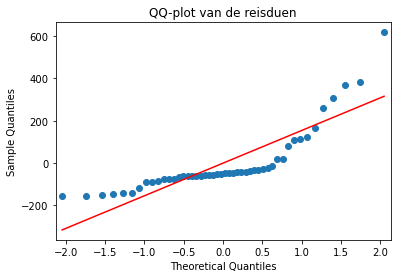

In [360]:
residuen = model_5.resid
print(stats.shapiro(residuen))

sm.qqplot(residuen, line = 's' )
plt.title('QQ-plot van de reisduen')
plt.show()

Voldoet niet aan normaliteit, dus er zullen t toetsen gedaan worden

In [361]:
lente_status_2 = overleden[overleden['Seizoen'] == 'Lente']
lente_status_2 = lente_status_2['Surv_days'].dropna()

zomer_status_2 = overleden[overleden['Seizoen'] == 'Zomer']
zomer_status_2 = zomer_status_2['Surv_days'].dropna()

herfst_status_2  = overleden[overleden['Seizoen'] == 'Herfst']
herfst_status_2  = herfst_status_2 ['Surv_days'].dropna()

winter_status_2  = overleden[overleden['Seizoen'] == 'Winter']
winter_status_2  = winter_status_2 ['Surv_days'].dropna()

In [362]:
print('t-toets op groepen lente_status_2  en zomer_status_2 :' , stats.ttest_ind(lente_status_2 ,zomer_status_2 ))
print('t-toets op groepen lente_status_2  en herfst_status_2 :' ,stats.ttest_ind(lente_status_2 ,herfst_status_2 ))
print('t-toets op groepen lente_status_2  en winter_status_2 :' ,stats.ttest_ind(lente_status_2 ,winter_status_2 ))
print('t-toets op groepen zomer_status_2  en herfst_status_2 :' ,stats.ttest_ind(zomer_status_2 ,herfst_status_2 ))
print('t-toets op groepen zomer_status_2  en winter_status_2 :' ,stats.ttest_ind(zomer_status_2 ,winter_status_2 ))
print('t-toets op groepen herfst_status_2  en winter_status_2 :' ,stats.ttest_ind(herfst_status_2 ,winter_status_2 ))

t-toets op groepen lente_status_2  en zomer_status_2 : Ttest_indResult(statistic=-0.8503185553250501, pvalue=0.40430769150470824)
t-toets op groepen lente_status_2  en herfst_status_2 : Ttest_indResult(statistic=0.9370859799079555, pvalue=0.35989329275062865)
t-toets op groepen lente_status_2  en winter_status_2 : Ttest_indResult(statistic=0.23914405215949452, pvalue=0.8132076768433963)
t-toets op groepen zomer_status_2  en herfst_status_2 : Ttest_indResult(statistic=1.5363624318867137, pvalue=0.13870789164071765)
t-toets op groepen zomer_status_2  en winter_status_2 : Ttest_indResult(statistic=0.989032383179063, pvalue=0.33251440335801674)
t-toets op groepen herfst_status_2  en winter_status_2 : Ttest_indResult(statistic=-0.40953048359618066, pvalue=0.6861104325966088)


In [363]:
overleden['Seizoen'].groupby(overleden['klimaat']).value_counts()

klimaat    Seizoen
A Klimaat  Herfst      3
           Zomer       3
           Winter      2
B Klimaat  Herfst      1
           Winter      1
C Klimaat  Lente      10
           Winter     10
           Zomer       8
           Herfst      7
D Klimaat  Zomer       2
           Lente       1
Name: Seizoen, dtype: int64

Voor een Anova heb je minimaal 3 waarden nodig. Voor klimaat B en D kunnen er dus geen toetsen worden uitgevoerd. Voor klimaat A Kunnen Herfst en Zomer vergeken worden
en voor klimaat C alles

Klimaat A


In [364]:
zomer_status_2 = overleden[overleden['Seizoen'] == 'Zomer']
zomer_status_2_A = zomer_status_2[zomer_status_2['klimaat'] == 'A Klimaat']
zomer_status_2_A = zomer_status_2_A['Surv_days'].dropna()

herfst_status_2  = overleden[overleden['Seizoen'] == 'Herfst']
herfst_status_2_A = herfst_status_2[herfst_status_2['klimaat'] == 'A Klimaat']
herfst_status_2_A  = herfst_status_2_A ['Surv_days'].dropna()


In [365]:
print('t-toets op groepen zomer_status_2_A  en herfst_status_2_A :' ,stats.ttest_ind(zomer_status_2_A ,herfst_status_2_A ))

t-toets op groepen zomer_status_2_A  en herfst_status_2_A : Ttest_indResult(statistic=1.7442238319686778, pvalue=0.15606577672255106)


Klimaat C

In [366]:
lente_status_2 = overleden[overleden['Seizoen'] == 'Lente']
lente_status_2_C = lente_status_2[lente_status_2['klimaat'] == 'C Klimaat']
lente_status_2_C = lente_status_2_C['Surv_days'].dropna()

zomer_status_2 = overleden[overleden['Seizoen'] == 'Zomer']
zomer_status_2_C = zomer_status_2[zomer_status_2['klimaat'] == 'C Klimaat']
zomer_status_2_C = zomer_status_2_C['Surv_days'].dropna()

herfst_status_2  = overleden[overleden['Seizoen'] == 'Herfst']
herfst_status_2_C = herfst_status_2[herfst_status_2['klimaat'] == 'C Klimaat']
herfst_status_2_C  = herfst_status_2_C ['Surv_days'].dropna()

winter_status_2  = overleden[overleden['Seizoen'] == 'Winter']
winter_status_2_C = winter_status_2[winter_status_2['klimaat'] == 'C Klimaat']
winter_status_2_C  = winter_status_2_C ['Surv_days'].dropna()

In [367]:
print('t-toets op groepen lente_status_2_C  en zomer_status_2_C :' , stats.ttest_ind(lente_status_2_C ,zomer_status_2_C ))
print('t-toets op groepen lente_status_2_C  en herfst_status_2_C :' ,stats.ttest_ind(lente_status_2_C ,herfst_status_2_C ))
print('t-toets op groepen lente_status_2_C  en winter_status_2_C :' ,stats.ttest_ind(lente_status_2_C ,winter_status_2_C ))
print('t-toets op groepen zomer_status_2_C  en herfst_status_2_C :' ,stats.ttest_ind(zomer_status_2_C ,herfst_status_2_C ))
print('t-toets op groepen zomer_status_2_C  en winter_status_2_C :' ,stats.ttest_ind(zomer_status_2_C ,winter_status_2_C ))
print('t-toets op groepen herfst_status_2_C en winter_status_2_C :' ,stats.ttest_ind(herfst_status_2_C ,winter_status_2_C ))

t-toets op groepen lente_status_2_C  en zomer_status_2_C : Ttest_indResult(statistic=-0.7303801445911297, pvalue=0.4757173071753579)
t-toets op groepen lente_status_2_C  en herfst_status_2_C : Ttest_indResult(statistic=0.6532644942662194, pvalue=0.523473703318507)
t-toets op groepen lente_status_2_C  en winter_status_2_C : Ttest_indResult(statistic=0.09823793391112447, pvalue=0.9228290625580621)
t-toets op groepen zomer_status_2_C  en herfst_status_2_C : Ttest_indResult(statistic=1.0655880048861623, pvalue=0.30600136572622205)
t-toets op groepen zomer_status_2_C  en winter_status_2_C : Ttest_indResult(statistic=0.6677613264337073, pvalue=0.5138034375388317)
t-toets op groepen herfst_status_2_C en winter_status_2_C : Ttest_indResult(statistic=-0.33305202401367373, pvalue=0.7437045734450745)


#### CSF_protein_level

In [368]:
df_csf = df[['CSF_protein_level', 'Seizoen', 'klimaat']]
model_6 = ols('CSF_protein_level ~ C(Seizoen)', data=df_csf).fit()
anova_table = sm.stats.anova_lm(model_6, typ=2)
print(anova_table)


                  sum_sq      df         F    PR(>F)
C(Seizoen)     77.313521     3.0  1.573121  0.194156
Residual    19019.722444  1161.0       NaN       NaN


ShapiroResult(statistic=0.10528069734573364, pvalue=0.0)


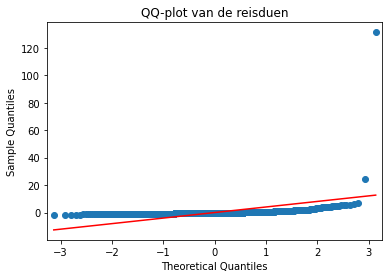

In [369]:
residuen = model_6.resid
print(stats.shapiro(residuen))

sm.qqplot(residuen, line = 's' )
plt.title('QQ-plot van de reisduen')
plt.show()

<AxesSubplot:xlabel='CSF_protein_level', ylabel='Seizoen'>

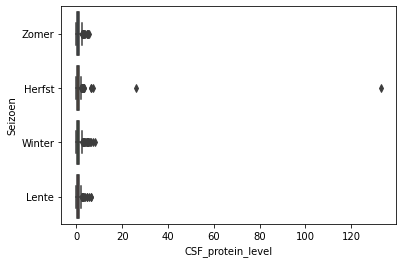

In [370]:
sns.boxplot(data=df_csf, x="CSF_protein_level", y="Seizoen")

In [371]:
Q1 = df_csf['CSF_protein_level'].quantile(0.0)
Q3 = df_csf['CSF_protein_level'].quantile(0.95)
IQR = Q3 - Q1

# identify outliers
threshold = 1.5
outliners = df_csf[(df_csf['CSF_protein_level'] < Q1 - threshold * IQR) | (df_csf['CSF_protein_level'] > Q3 + threshold * IQR)]

In [372]:
uitbijters = outliners['CSF_protein_level']

In [373]:
for i in uitbijters:
    df_csf = df_csf.drop(df_csf[df_csf['CSF_protein_level'] == i].index)

##### outliner van csf_protein_level verwijderen

In [374]:
df_csf

,CSF_protein_level,Seizoen,klimaat
0,0.84,Zomer,C Klimaat
1,0.51,Herfst,A Klimaat
2,3.28,Winter,D Klimaat
3,0.42,Lente,C Klimaat
4,1.47,Winter,C Klimaat
...,...,...,...
1494,1.16,Winter,C Klimaat
1496,NaN,Winter,C Klimaat
1497,0.63,Herfst,C Klimaat
1498,1.03,Lente,C Klimaat


Text(0, 0.5, 'Seizoenen')

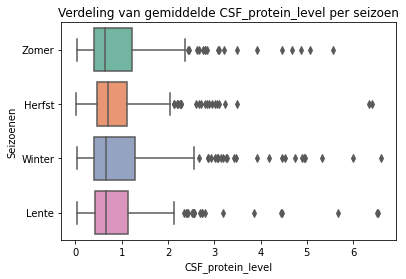

In [375]:
sns.boxplot(data=df_csf, x="CSF_protein_level", y="Seizoen", palette='Set2')

plt.title('Verdeling van gemiddelde CSF_protein_level per seizoen')
plt.xlabel('CSF_protein_level')
plt.ylabel('Seizoenen')

In [376]:
model_7 = ols('CSF_protein_level ~ C(Seizoen)', data=df_csf).fit()
anova_table = sm.stats.anova_lm(model_7, typ=2)
print(anova_table)


                sum_sq      df         F   PR(>F)
C(Seizoen)    1.055686     3.0  0.428482  0.73263
Residual    949.377385  1156.0       NaN      NaN


ShapiroResult(statistic=0.7267235517501831, pvalue=6.888474964958649e-40)


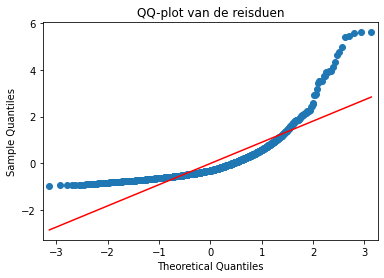

In [377]:
residuen = model_7.resid
print(stats.shapiro(residuen))

sm.qqplot(residuen, line = 's' )
plt.title('QQ-plot van de reisduen')
plt.show()

Anova mag niet vanwege gebrek aan normaliteit

In [378]:
lente_csf = df_csf[df_csf['Seizoen'] == 'Lente']
lente_csf = lente_csf['CSF_protein_level'].dropna()

zomer_csf = df_csf[df_csf['Seizoen'] == 'Zomer']
zomer_csf = zomer_csf['CSF_protein_level'].dropna()

herfst_csf  = df_csf[df_csf['Seizoen'] == 'Herfst']
herfst_csf  = herfst_csf['CSF_protein_level'].dropna()

winter_csf  = df_csf[df_csf['Seizoen'] == 'Winter']
winter_csf  = winter_csf['CSF_protein_level'].dropna()

In [379]:
print('t-toets op groepen lente_csf  en zomer_csf :' , stats.ttest_ind(lente_csf ,zomer_csf ))
print('t-toets op groepen lente_csf  en herfst_csf :' ,stats.ttest_ind(lente_csf ,herfst_csf ))
print('t-toets op groepen lente_csf  en winter_csf :' ,stats.ttest_ind(lente_csf ,winter_csf ))
print('t-toets op groepen zomer_csf  en herfst_csf :' ,stats.ttest_ind(zomer_csf ,herfst_csf ))
print('t-toets op groepen zomer_csf  en winter_csf :' ,stats.ttest_ind(zomer_csf ,winter_csf ))
print('t-toets op groepen herfst_csf  en winter_csf :' ,stats.ttest_ind(herfst_csf ,winter_csf ))

t-toets op groepen lente_csf  en zomer_csf : Ttest_indResult(statistic=-0.14070778776574852, pvalue=0.8881513898101143)
t-toets op groepen lente_csf  en herfst_csf : Ttest_indResult(statistic=-0.006294606179881487, pvalue=0.9949800326075233)
t-toets op groepen lente_csf  en winter_csf : Ttest_indResult(statistic=-0.9172103876737296, pvalue=0.3593757591579563)
t-toets op groepen zomer_csf  en herfst_csf : Ttest_indResult(statistic=0.13263527935816183, pvalue=0.894533939311998)
t-toets op groepen zomer_csf  en winter_csf : Ttest_indResult(statistic=-0.7630671919235344, pvalue=0.44571078014942733)
t-toets op groepen herfst_csf  en winter_csf : Ttest_indResult(statistic=-0.8816493716186133, pvalue=0.3783218626927287)


In [380]:
df_csf['Seizoen'].groupby(df_csf['klimaat']).value_counts()

klimaat    Seizoen
A Klimaat  Lente       58
           Winter      57
           Herfst      47
           Zomer       43
B Klimaat  Winter      27
           Lente       24
           Herfst      20
           Zomer       18
C Klimaat  Winter     269
           Lente      218
           Zomer      208
           Herfst     172
D Klimaat  Winter      47
           Herfst      38
           Zomer       34
           Lente       33
Name: Seizoen, dtype: int64

Nu voor elk klimaat 

Klimaat A

In [381]:
lente_csf = df_csf[df_csf['Seizoen'] == 'Lente']
lente_csf_A = lente_csf[lente_csf['klimaat'] == 'A Klimaat']
lente_csf_A = lente_csf_A['CSF_protein_level'].dropna()

zomer_csf = df_csf[df_csf['Seizoen'] == 'Zomer']
zomer_csf_A = zomer_csf[zomer_csf['klimaat'] == 'A Klimaat']
zomer_csf_A = zomer_csf_A['CSF_protein_level'].dropna()

herfst_csf  = df_csf[df_csf['Seizoen'] == 'Herfst']
herfst_csf_A = herfst_csf[herfst_csf['klimaat'] == 'A Klimaat']
herfst_csf_A  = herfst_csf_A ['CSF_protein_level'].dropna()

winter_csf  = df_csf[df_csf['Seizoen'] == 'Winter']
winter_csf_A = winter_csf[winter_csf['klimaat'] == 'A Klimaat']
winter_csf_A  = winter_csf_A ['CSF_protein_level'].dropna()

In [382]:
print('t-toets op groepen lente_csf_A  en zomer_csf_A :' , stats.ttest_ind(lente_csf_A ,zomer_csf_A ))
print('t-toets op groepen lente_csf_A  en herfst_csf_A :' ,stats.ttest_ind(lente_csf_A ,herfst_csf_A ))
print('t-toets op groepen lente_csf_A  en winter_csf_A :' ,stats.ttest_ind(lente_csf_A ,winter_csf_A ))
print('t-toets op groepen zomer_csf_A  en herfst_csf_A :' ,stats.ttest_ind(zomer_csf_A ,herfst_csf_A ))
print('t-toets op groepen zomer_csf_A  en winter_csf_A :' ,stats.ttest_ind(zomer_csf_A ,winter_csf_A ))
print('t-toets op groepen herfst_csf_A  en winter_csf_A :' ,stats.ttest_ind(herfst_csf_A ,winter_csf_A ))

t-toets op groepen lente_csf_A  en zomer_csf_A : Ttest_indResult(statistic=0.08201120494590326, pvalue=0.9348140521307178)
t-toets op groepen lente_csf_A  en herfst_csf_A : Ttest_indResult(statistic=-0.4146559471228571, pvalue=0.6793385782185737)
t-toets op groepen lente_csf_A  en winter_csf_A : Ttest_indResult(statistic=-0.3297021552591119, pvalue=0.7423287069381164)
t-toets op groepen zomer_csf_A  en herfst_csf_A : Ttest_indResult(statistic=-0.4800337549858685, pvalue=0.6324660611691802)
t-toets op groepen zomer_csf_A  en winter_csf_A : Ttest_indResult(statistic=-0.40413671687824637, pvalue=0.6871039380341593)
t-toets op groepen herfst_csf_A  en winter_csf_A : Ttest_indResult(statistic=0.10403602230002677, pvalue=0.9173775041545112)


Klimaat B

In [383]:
lente_csf = df_csf[df_csf['Seizoen'] == 'Lente']
lente_csf_B = lente_csf[lente_csf['klimaat'] == 'B Klimaat']
lente_csf_B = lente_csf_B['CSF_protein_level'].dropna()

zomer_csf = df_csf[df_csf['Seizoen'] == 'Zomer']
zomer_csf_B = zomer_csf[zomer_csf['klimaat'] == 'B Klimaat']
zomer_csf_B = zomer_csf_B['CSF_protein_level'].dropna()

herfst_csf  = df_csf[df_csf['Seizoen'] == 'Herfst']
herfst_csf_B = herfst_csf[herfst_csf['klimaat'] == 'B Klimaat']
herfst_csf_B  = herfst_csf_B ['CSF_protein_level'].dropna()

winter_csf  = df_csf[df_csf['Seizoen'] == 'Winter']
winter_csf_B = winter_csf[winter_csf['klimaat'] == 'B Klimaat']
winter_csf_B  = winter_csf_B ['CSF_protein_level'].dropna()

In [384]:
print('t-toets op groepen lente_csf_B  en zomer_csf_B :' , stats.ttest_ind(lente_csf_B ,zomer_csf_B ))
print('t-toets op groepen lente_csf_B  en herfst_csf_B :' ,stats.ttest_ind(lente_csf_B ,herfst_csf_B ))
print('t-toets op groepen lente_csf_B  en winter_csf_B :' ,stats.ttest_ind(lente_csf_B ,winter_csf_B ))
print('t-toets op groepen zomer_csf_B  en herfst_csf_B :' ,stats.ttest_ind(zomer_csf_B ,herfst_csf_B ))
print('t-toets op groepen zomer_csf_B  en winter_csf_B :' ,stats.ttest_ind(zomer_csf_B ,winter_csf_B ))
print('t-toets op groepen herfst_csf_B  en winter_csf_B :' ,stats.ttest_ind(herfst_csf_B ,winter_csf_B ))

t-toets op groepen lente_csf_B  en zomer_csf_B : Ttest_indResult(statistic=0.9943208244126938, pvalue=0.3270908642404662)
t-toets op groepen lente_csf_B  en herfst_csf_B : Ttest_indResult(statistic=0.678016045487643, pvalue=0.502096487015177)
t-toets op groepen lente_csf_B  en winter_csf_B : Ttest_indResult(statistic=-0.6511628416777342, pvalue=0.5184884498799265)
t-toets op groepen zomer_csf_B  en herfst_csf_B : Ttest_indResult(statistic=-0.5319268853630217, pvalue=0.5984505531081022)
t-toets op groepen zomer_csf_B  en winter_csf_B : Ttest_indResult(statistic=-1.6818196631695823, pvalue=0.10080553516232253)
t-toets op groepen herfst_csf_B  en winter_csf_B : Ttest_indResult(statistic=-1.4086156579460092, pvalue=0.16667493950124607)


Klimaat C

In [385]:
lente_csf = df_csf[df_csf['Seizoen'] == 'Lente']
lente_csf_C = lente_csf[lente_csf['klimaat'] == 'C Klimaat']
lente_csf_C = lente_csf_C['CSF_protein_level'].dropna()

zomer_csf = df_csf[df_csf['Seizoen'] == 'Zomer']
zomer_csf_C = zomer_csf[zomer_csf['klimaat'] == 'C Klimaat']
zomer_csf_C = zomer_csf_C['CSF_protein_level'].dropna()

herfst_csf  = df_csf[df_csf['Seizoen'] == 'Herfst']
herfst_csf_C = herfst_csf[herfst_csf['klimaat'] == 'C Klimaat']
herfst_csf_C  = herfst_csf_C['CSF_protein_level'].dropna()

winter_csf  = df_csf[df_csf['Seizoen'] == 'Winter']
winter_csf_C = winter_csf[winter_csf['klimaat'] == 'C Klimaat']
winter_csf_C  = winter_csf_C['CSF_protein_level'].dropna()

In [386]:
print('t-toets op groepen lente_csf_C  en zomer_csf_C :' , stats.ttest_ind(lente_csf_C ,zomer_csf_C ))
print('t-toets op groepen lente_csf_C  en herfst_csf_C :' ,stats.ttest_ind(lente_csf_C ,herfst_csf_C ))
print('t-toets op groepen lente_csf_C  en winter_csf_C :' ,stats.ttest_ind(lente_csf_C ,winter_csf_C ))
print('t-toets op groepen zomer_csf_C  en herfst_csf_C :' ,stats.ttest_ind(zomer_csf_C ,herfst_csf_C ))
print('t-toets op groepen zomer_csf_C  en winter_csf_C :' ,stats.ttest_ind(zomer_csf_C ,winter_csf_C ))
print('t-toets op groepen herfst_csf_C  en winter_csf_C :' ,stats.ttest_ind(herfst_csf_C ,winter_csf_C ))

t-toets op groepen lente_csf_C  en zomer_csf_C : Ttest_indResult(statistic=-0.9441428256777816, pvalue=0.345717802130605)
t-toets op groepen lente_csf_C  en herfst_csf_C : Ttest_indResult(statistic=-0.09996039277163393, pvalue=0.9204353846301131)
t-toets op groepen lente_csf_C  en winter_csf_C : Ttest_indResult(statistic=-0.787706110202898, pvalue=0.4313066878983496)
t-toets op groepen zomer_csf_C  en herfst_csf_C : Ttest_indResult(statistic=0.8139287829554458, pvalue=0.41627444410459846)
t-toets op groepen zomer_csf_C  en winter_csf_C : Ttest_indResult(statistic=0.18352926179038975, pvalue=0.8544715403448325)
t-toets op groepen herfst_csf_C  en winter_csf_C : Ttest_indResult(statistic=-0.6523413795779788, pvalue=0.5145672465246306)


Klimaat D

In [387]:
lente_csf = df_csf[df_csf['Seizoen'] == 'Lente']
lente_csf_D = lente_csf[lente_csf['klimaat'] == 'D Klimaat']
lente_csf_D = lente_csf_D['CSF_protein_level'].dropna()

zomer_csf = df_csf[df_csf['Seizoen'] == 'Zomer']
zomer_csf_D = zomer_csf[zomer_csf['klimaat'] == 'D Klimaat']
zomer_csf_D = zomer_csf_D['CSF_protein_level'].dropna()

herfst_csf  = df_csf[df_csf['Seizoen'] == 'Herfst']
herfst_csf_D = herfst_csf[herfst_csf['klimaat'] == 'D Klimaat']
herfst_csf_D  = herfst_csf_D['CSF_protein_level'].dropna()

winter_csf  = df_csf[df_csf['Seizoen'] == 'Winter']
winter_csf_D = winter_csf[winter_csf['klimaat'] == 'D Klimaat']
winter_csf_D  = winter_csf_D['CSF_protein_level'].dropna()

In [388]:
print('t-toets op groepen lente_csf_D  en zomer_csf_D :' , stats.ttest_ind(lente_csf_D ,zomer_csf_D ))
print('t-toets op groepen lente_csf_D  en herfst_csf_D :' ,stats.ttest_ind(lente_csf_D ,herfst_csf_D ))
print('t-toets op groepen lente_csf_D  en winter_csf_D :' ,stats.ttest_ind(lente_csf_D ,winter_csf_D ))
print('t-toets op groepen zomer_csf_D  en herfst_csf_D :' ,stats.ttest_ind(zomer_csf_D ,herfst_csf_D ))
print('t-toets op groepen zomer_csf_D  en winter_csf_D :' ,stats.ttest_ind(zomer_csf_D ,winter_csf_D ))
print('t-toets op groepen herfst_csf_D  en winter_csf_D :' ,stats.ttest_ind(herfst_csf_D ,winter_csf_D ))

t-toets op groepen lente_csf_D  en zomer_csf_D : Ttest_indResult(statistic=0.8540264891044536, pvalue=0.39648727085468294)
t-toets op groepen lente_csf_D  en herfst_csf_D : Ttest_indResult(statistic=0.1566502794455547, pvalue=0.8760644886512179)
t-toets op groepen lente_csf_D  en winter_csf_D : Ttest_indResult(statistic=0.40789819139726224, pvalue=0.6845588344566673)
t-toets op groepen zomer_csf_D  en herfst_csf_D : Ttest_indResult(statistic=-0.6424364037906026, pvalue=0.5229584667483107)
t-toets op groepen zomer_csf_D  en winter_csf_D : Ttest_indResult(statistic=-0.5105258523026504, pvalue=0.6111628113110674)
t-toets op groepen herfst_csf_D  en winter_csf_D : Ttest_indResult(statistic=0.21696372360697014, pvalue=0.8288336773112033)
